# Covid-19 : Data Analysis
![](https://www.imf.org/-/media/Images/IMF/Topics/COVID19/lending-tracker-fullsize-istock-1213355637.ashx?h=1413&w=2122&la=en)

### Contents
1. Introduction
2. Goal
3. Dataset
4. Data Visualization
5. How many countries were affected by Covid-19?
6. Percentage of confirmed cases held by different countries.
7. Top 5 affected countries
8. Recovered vs death cases in top 5 countries

9. **Chapter 1** - China - The first epicenter
    - Total cases
    - Per day Statistics
    - Total no. of confirmed cases
    - Total no. of recovered cases
    - Total no. of death cases
    - Confirmed cases increment day by day
    - Death cases increment day by day
    - Hubei Province

10. **Chapter 2** - World excluding China - Data Analysis
    - Per day Statistics
    - Total no. of confirmed cases
    - Total no. of recovered cases
    - Total no. of death cases
    - Confirmed cases increment day by day
    - Death cases increment day by day

11. **Chapter 3** - Condition of the major countries
    - Italy
    - USA
    - South Korea
    - United Kingdom
    - Germany
    - Japan
    - Australia
    - India

12. **Chapter 4** - Lockdown - The saviour or, not!
    - China
    - Italy
    - USA
    - South Korea
    - United Kingdom
    - Germany
    - Japan
    - Australia
13. **Chapter 5** - India : The Fastest Growing Epicenter
    - Per day Statistics
    - Total no. of confirmed cases
    - Total no. of recovered cases
    - Total no. of death cases
    - Confirmed cases increment day by day
    - Death cases increment day by day
    - Lockdown
14. Conclusion

-----------------------

#  Introduction

On 30 January 2020 the World Health Organization (WHO) declared that the SARS-CoV-2 outbreak constitutes a Public Health Emergency of International Concern (PHEIC). The COVID-19 crisis is putting high pressure on the research community to speed up science discovery, inform the public health response and help save lives, as demonstrated by the activation by the WHO of the R&D Blueprint to accelerate diagnostics, vaccines and therapeutics for this novel virus. A necessary complementary action to accelerate and amplify impact is to ensure that research findings and data relevant to this outbreak, are shared as rapidly, openly and effectively as possible.Therefore, the European Commission urges researchers of Horizon 2020 grants with research outputs that - in any way - may be used to advance the research on COVID-19, to provide immediate open access to their related publications, data and any other output possible, in line with the guidance offered in this document. These can be projects specifically researching on the corona virus, but also other research fields/disciplines with relevance to tackle the corona crisis. Similarly, the European Commission urges research infrastructures projects, developing and/or providing access services to relevant research tools and resources, to provide priority and customised access to their services for research on COVID-19.More particularly, the European Commission strongly encourages beneficiaries to follow the guidelines below, thereby exceeding the current Open Access requirements of Horizon 2020 and going beyond the legal obligations enshrined in the Horizon 2020 Grant Agreement (GA), in order to address the current public health emergency. The guidelines build on both the commitments made by the European Commission as a signatory of the Statement on Data Sharing in Public Health Emergency, and on the principles established in the GA. 

## Goal
The goal of this project is to Analyze the situation caused due to Covid-19 pandemic, how were the countries affected, how were the confirmed cases increased day by day, how the death toll rose, and also what have the major countries done to face off the challenge and how they overcome the situation, whether the implementation of the lockdown was successful or, not, everything will be analyzed in this project.  

## Dataset
The dataset which I am going to use easily available in the Kaggle. Here is the link for the dataset : https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset. Also I'll be uploading the dataset in the Dataset folder too, so that you can directly use that dataset.

Importing all the Libraries that we need to do this project work

In [1]:
import numpy as np
import pandas as pd
import os

In [2]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Imported a dataset of Covid 19 where the data is stored upto 29.05.2021

In [3]:
df = pd.read_csv('covid_192_data.csv')
df.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


Shape of the dataset

In [4]:
df.shape

(306429, 8)

Information regarding the dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306429 entries, 0 to 306428
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   SNo              306429 non-null  int64  
 1   ObservationDate  306429 non-null  object 
 2   Province/State   228329 non-null  object 
 3   Country/Region   306429 non-null  object 
 4   Last Update      306429 non-null  object 
 5   Confirmed        306429 non-null  float64
 6   Deaths           306429 non-null  float64
 7   Recovered        306429 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 18.7+ MB


We will convert the ObservationDate and Last Update to datetime since they are currently taken as object

The counts for 'Confirmed' , 'Deaths' and 'Recovered' will be converted into int datatype for the simplicity of the usage

In [6]:
df['ObservationDate'] = pd.to_datetime(df['ObservationDate'])
df['Last Update'] = pd.to_datetime(df['Last Update'])
df['Confirmed']=df['Confirmed'].astype('int')
df['Deaths']=df['Deaths'].astype('int')
df['Recovered']=df['Recovered'].astype('int')

Since the final count of the cases is present on 12th August, 2020 we are trying to create a separate dataframe for the same

In [7]:
from datetime import date
recent = df[['ObservationDate']][-1:].max()
df_update=df.loc[df.ObservationDate==pd.Timestamp(recent['ObservationDate'])]
df_update

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
305664,305665,2021-05-29,NaN,Afghanistan,2021-05-30 04:20:55,70111,2899,57281
305665,305666,2021-05-29,NaN,Albania,2021-05-30 04:20:55,132297,2449,129215
305666,305667,2021-05-29,NaN,Algeria,2021-05-30 04:20:55,128456,3460,89419
305667,305668,2021-05-29,NaN,Andorra,2021-05-30 04:20:55,13693,127,13416
305668,305669,2021-05-29,NaN,Angola,2021-05-30 04:20:55,34180,757,27646
...,...,...,...,...,...,...,...,...
306424,306425,2021-05-29,Zaporizhia Oblast,Ukraine,2021-05-30 04:20:55,102641,2335,95289
306425,306426,2021-05-29,Zeeland,Netherlands,2021-05-30 04:20:55,29147,245,0
306426,306427,2021-05-29,Zhejiang,Mainland China,2021-05-30 04:20:55,1364,1,1324
306427,306428,2021-05-29,Zhytomyr Oblast,Ukraine,2021-05-30 04:20:55,87550,1738,83790


Out of the 306429 records we are now left with only 758 and many of the records don't have the Province defined

These are the provinces that are basically a not part of China

**Whenever provinces are null, we replace them with the country name and group mainland China and China together in China**

In [8]:
df_update.isnull().sum()

SNo                  0
ObservationDate      0
Province/State     172
Country/Region       0
Last Update          0
Confirmed            0
Deaths               0
Recovered            0
dtype: int64

In [9]:
df_update['Province/State']=df_update.apply(lambda x: x['Country/Region'] if pd.isnull(x['Province/State']) else x['Province/State'],axis=1)
df['Province/State']=df.apply(lambda x: x['Country/Region'] if pd.isnull(x['Province/State']) else x['Province/State'],axis=1)

In [10]:
df_update['Country/Region']=df_update.apply(lambda x:'China' if x['Country/Region']=='Mainland China' else x['Country/Region'],axis=1)
df['Country/Region']=df.apply(lambda x:'China' if x['Country/Region']=='Mainland China' else x['Country/Region'],axis=1)

We are performing the encoding of the country to CountryID and Province to ProvinceID

In [11]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_update['ProvinceID'] = le.fit_transform(df_update['Province/State'])
df_update['CountryID']=le.fit_transform(df_update['Country/Region'])
df_update.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,ProvinceID,CountryID
305664,305665,2021-05-29,Afghanistan,Afghanistan,2021-05-30 04:20:55,70111,2899,57281,3,0
305665,305666,2021-05-29,Albania,Albania,2021-05-30 04:20:55,132297,2449,129215,10,1
305666,305667,2021-05-29,Algeria,Algeria,2021-05-30 04:20:55,128456,3460,89419,12,2
305667,305668,2021-05-29,Andorra,Andorra,2021-05-30 04:20:55,13693,127,13416,22,3
305668,305669,2021-05-29,Angola,Angola,2021-05-30 04:20:55,34180,757,27646,23,4


## Presenting the Heatmap for all the 'Confirmed','Recovered' and 'Casualties' with respect to the ProvinceID and CountryID

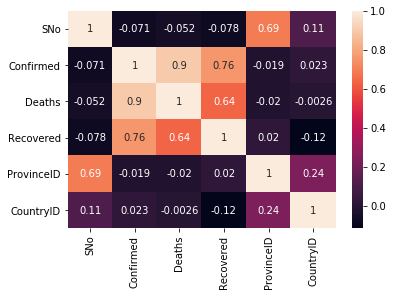

In [12]:
corr = df_update.corr()
sns.heatmap(corr, annot = True)

**********************

## A. Finding out How many countries were affected by Covid-19

In [13]:
print(df['Country/Region'].unique())
print("\nNumber of countries impacted by COVID 2019:",len(df['Country/Region'].unique()))

['China' 'Hong Kong' 'Macau' 'Taiwan' 'US' 'Japan' 'Thailand'
 'South Korea' 'Kiribati' 'Singapore' 'Philippines' 'Malaysia' 'Vietnam'
 'Australia' 'Mexico' 'Brazil' 'Colombia' 'France' 'Nepal' 'Canada'
 'Cambodia' 'Sri Lanka' 'Ivory Coast' 'Germany' 'Finland'
 'United Arab Emirates' 'India' 'Italy' 'UK' 'Russia' 'Sweden' 'Spain'
 'Belgium' 'Others' 'Egypt' 'Iran' 'Israel' 'Lebanon' 'Iraq' 'Oman'
 'Afghanistan' 'Bahrain' 'Kuwait' 'Austria' 'Algeria' 'Croatia'
 'Switzerland' 'Pakistan' 'Georgia' 'Greece' 'North Macedonia' 'Norway'
 'Romania' 'Denmark' 'Estonia' 'Netherlands' 'San Marino' ' Azerbaijan'
 'Belarus' 'Iceland' 'Lithuania' 'New Zealand' 'Nigeria' 'North Ireland'
 'Ireland' 'Luxembourg' 'Monaco' 'Qatar' 'Ecuador' 'Azerbaijan'
 'Czech Republic' 'Armenia' 'Dominican Republic' 'Indonesia' 'Portugal'
 'Andorra' 'Latvia' 'Morocco' 'Saudi Arabia' 'Senegal' 'Argentina' 'Chile'
 'Jordan' 'Ukraine' 'Saint Barthelemy' 'Hungary' 'Faroe Islands'
 'Gibraltar' 'Liechtenstein' 'Poland' 'Tuni

Total of 228 countries are affected by this virus, where the epicentre of this virus is Hubei Province of Mainland China 

***********

## B. Percentage of confirmed cases per country through the Pie-chart

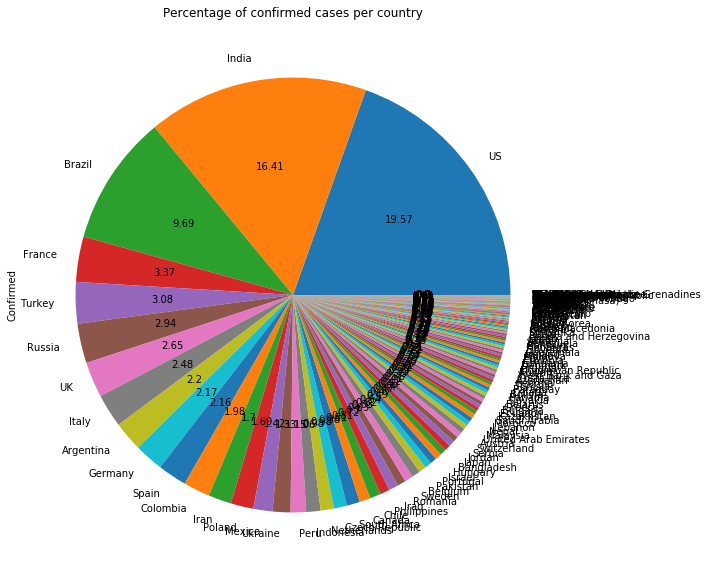

In [14]:
fig = plt.figure(figsize=(10,10))
conf_per_country = df_update.groupby('Country/Region')['Confirmed'].sum().sort_values(ascending=False)
conf_sum=df_update['Confirmed'].sum()
def absolute_value(val):
    a  = val
    return (np.round(a,2))
conf_per_country.plot(kind="pie",title='Percentage of confirmed cases per country',autopct=absolute_value)

plt.show ()

**Observation**

Approximately 20% of the total confirmed cases of the world is found at United States of America

After USA, there are India and Brazil;, the 2nd and 3rd most affected countries in the world where the percentage of confirmed cases reported with respect to the world is 16.41% and 9.69% respectively

****************

## C. Top 5 countries having most number of confirmed cases till 29th May, 2021

**The overall number of global coronavirus cases has surpassed the 43 million mark, while the deaths have increased to over1.16 million, according to the Johns Hopkins University.**

1. The United States tops 8.7 million coronavirus case. The United States on Tuesday surpassed 8,704,606 novel coronavirus cases, according to Johns Hopkins University. The pandemic has now claimed the lives of at least 225,735 people in the United States, which leads the world in the number of confirmed infections.

2. India is now the second worst-affected country by COVID-19.India's novel Coronavirus tally crossed the 7.9 million mark on Tuesday with detection of less than 40,000 new cases in the last 24 hours, the Indian Health Ministry said. The state of Maharashtra, Andhra Pradesh, Tamil Nadu, Karnataka and Uttar Pradesh were among the five worst-affected states in India.

3. Brazil with more than 5.4 million cases. Third, in the list of the worst affected countries, Brazil has more than 5.4 million confirmed cases, according to Johns Hopkins University. The country has so far reported 5,409,854 total cases and 157,397 deaths due to coronavirus.

4. Russia with more than 1.5 million cases. Russia reported more than 1,537,142 cases of coronavirus infections so far and 26,409 deaths. The country has the fourth-highest number of infections behind the United States, India and Brazil, but the number of new cases has seen a stellar rise every day in the past month.

5. France with 1.2 million coronavirus cases. France&#39;s novel coronavirus tally crossed the 1.2 million mark on Tuesday with the death toll rising to 35,052, according to John Hopkins University.

In [15]:
group_cases=df_update[['Confirmed','Recovered','Deaths','Country/Region']].groupby('Country/Region').sum().sort_values('Confirmed',ascending=False).head()
group_cases=group_cases.reset_index()
group_cases

,Country/Region,Confirmed,Recovered,Deaths
0,US,33251939,0,594306
1,India,27894800,25454320,325972
2,Brazil,16471600,14496224,461057
3,France,5719877,390878,109518
4,Turkey,5235978,5094279,47271


**Representing the Top 5 most affected countries with gradient, where darker the colour is values of that particular area is the greatest**

In [16]:
group_cases['Recovery Rate']=round(group_cases['Recovered'] / group_cases['Confirmed'],2)
group_cases['Death Rate']=round(group_cases['Deaths'] / group_cases['Confirmed'],2)
group_cases=group_cases.sort_values(by='Confirmed', ascending= False)
group_cases.style.background_gradient(cmap='Greens')

,Country/Region,Confirmed,Recovered,Deaths,Recovery Rate,Death Rate
0,US,33251939,0,594306,0.000000,0.020000
1,India,27894800,25454320,325972,0.910000,0.010000
2,Brazil,16471600,14496224,461057,0.880000,0.030000
3,France,5719877,390878,109518,0.070000,0.020000
4,Turkey,5235978,5094279,47271,0.970000,0.010000


*************

## D. Plotting the Bar Graph representation where it's showing the Confirmed cases, Recovered cases and Death tolls in the Top 5 affected countries till 29th May, 2021

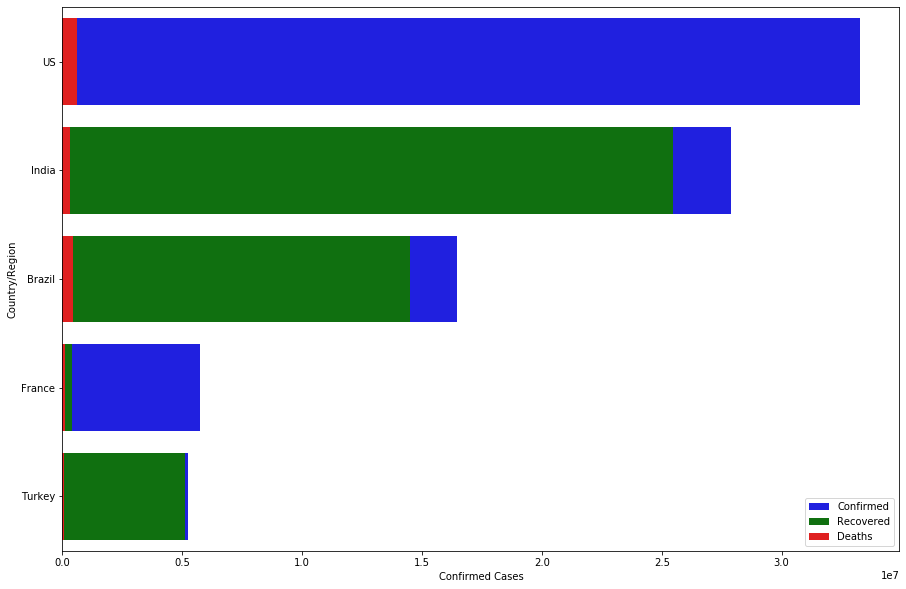

In [17]:
f, ax = plt.subplots(figsize=(15, 10))
bar1=sns.barplot(x="Confirmed",y="Country/Region",data=group_cases,
            label="Confirmed", color="b")


bar2=sns.barplot(x="Recovered", y="Country/Region", data=group_cases,
            label="Recovered", color="g")


bar3=sns.barplot(x="Deaths", y="Country/Region", data=group_cases,
            label="Deaths", color="r")

ax.legend(loc=4, ncol = 1)
plt.xlabel("Confirmed Cases")
plt.show()

*************

## E. Recovered Cases v/s Death Cases in the Top 5 countries

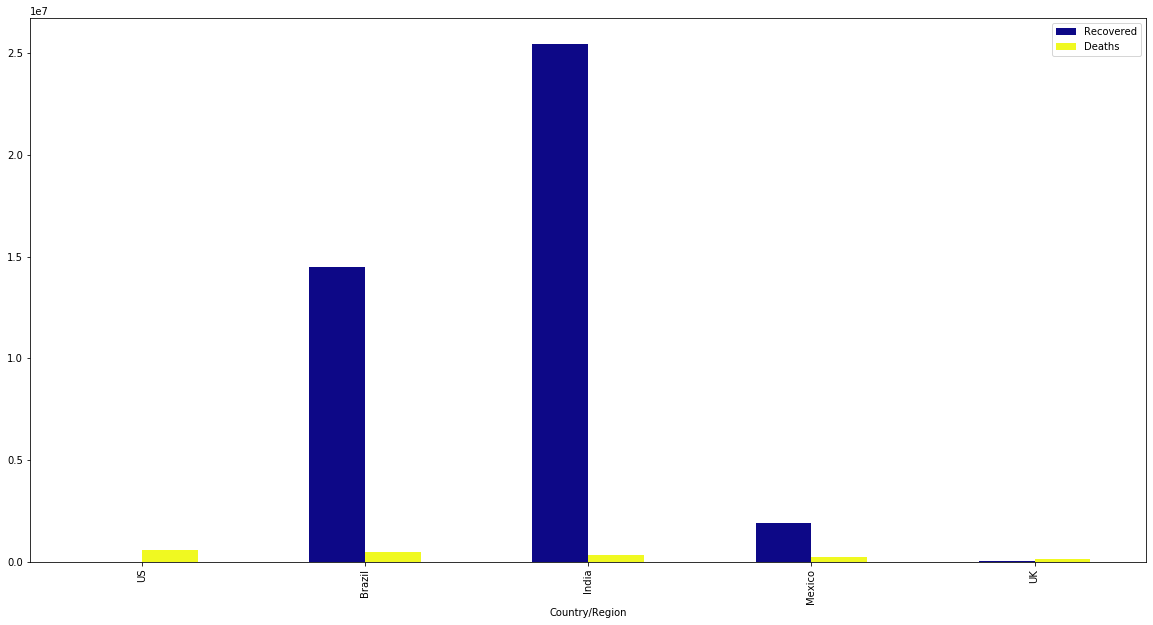

In [18]:
group_cases=df_update[['Recovered','Deaths','Country/Region']].groupby('Country/Region').sum().sort_values('Deaths',ascending=False).head()
group_cases.plot(kind='bar',width=0.5,colormap='plasma',figsize=(20,10))
plt.show()

********************
******************

# Chapter 1 : China - The First Epicentre of the pandemic

- On December 29 th Wuhan City government starts to trace cases

- On January 4 th Shanghai lab detects coronavirus similar to SARS

- On January 6 th Wuhan doctor, 13 nurses infected after operating on infected patient

- On January 7 th Pathogen identified as novel coronavirus

- On January 13 th Incubation period identified as 14 days

- On January 17 th Baibuting neighbourhood in Wuhan holds Lunar New Year banquet

- On January 19 th Pulmonologist Nanshan Zhong announces human- to-human spread

- On January 20 th Annual Spring Festival travel rush begins in Hubei Province

- On January 23 rd Wuhan placed under quarantine

- On January 23 rd Announced new hospital to be built in 10 days

- On January 26 th Hundreds of medical staff, equipment and food sent to Wuhan

- On January 28 th Thousands more medical workers sent to Wuhan  (1/28-1/29)

- On February 1 st Member of Chinese Academy of Science leads team to support Wuhan

- On February 2 nd China Central Bank carried out a reverse repurchase of 1.2 trillion RMB ($170B)

- On February 3 rd First Wuhan field hospital opens; More hospitals built overnight

- On February 5 th Diagnostic criteria expanded

- On February 9 th Another 3,187 medical workers sent to Hubei Province

- On February 10 th 19 provinces partner with 16 cities in Hubei for assistance

- On February 12 th Hubei Province incorporates diagnostic change

- On February 14 th Wuhan asks recovered patients to donate plasma

- On February 19 th Another 1,299 medical workers sent to Wuhan as city disinfects sewage

- On February 24 th China bans trade, consumption of wild animals, and postpones annual parliamentary meeting

- On February 26 th Daily new cases outside China surpass those inside the country

- On February 29 th China-WHO joint investigation report on COVID-19 published

- On April 15 th China issued revised death and case count


### A. Since China is the first epicentre of this pandemic situation, we are checking for provinces within China to detect the spread out of the virus

In [19]:
china_cases=df_update.loc[df_update['Country/Region']=='China']

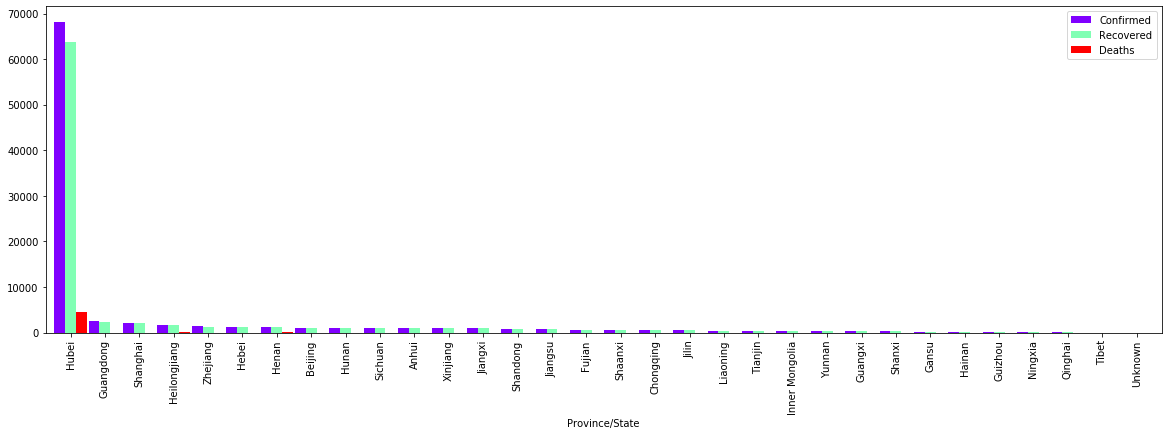

In [20]:
china_province_cases=china_cases[['Confirmed','Recovered','Deaths','Province/State']].groupby('Province/State').sum().sort_values('Confirmed',ascending=False)
china_province_cases.plot(kind='bar',width=0.95,colormap='rainbow',figsize=(20,6))
plt.show()

The above representation is showing that the most affected are or, Province in China is Hubei where the confirmed cases are reached to 70000 and approximately 90% of the cases of Total China's Confirmed Cases

### B. The per-day statistics of China where the line graph shows flattening of curve confirmed cases. However on 17th April there was a sudden rise in the Death and Confirmed cases

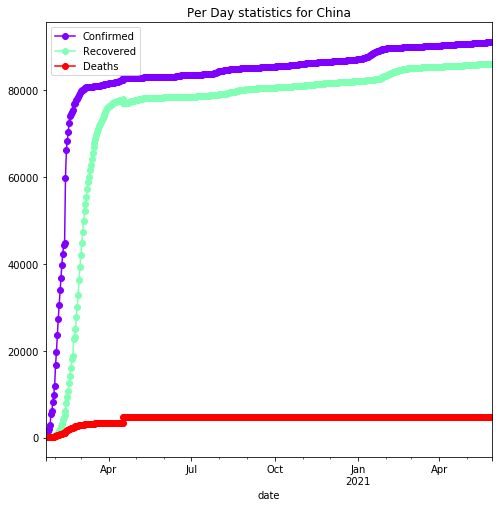

In [21]:
china_cases_complete=df.loc[df['Country/Region']=='China']
china_cases_complete['date'] = china_cases_complete['ObservationDate'].dt.date
china_cases_complete['date']=pd.to_datetime(china_cases_complete['date'])
china_cases_complete = china_cases_complete[china_cases_complete['date'] > pd.Timestamp(date(2020,1,21))]
num_plot = china_cases_complete.groupby('date')["Confirmed", "Recovered", "Deaths"].sum()
num_plot.plot(figsize=(8,8),title='Per Day statistics for China',colormap='rainbow',marker='o')
plt.show()

This graph shows how much stiff the growth rate is in the past months of February and March 2020

In [22]:
num_plot_china=num_plot.reset_index()
num_plot_china['Death Case Increase']=0
num_plot_china['Confirmed Case Increase']=0
num_plot_china['Confirmed Case Increase'][0]=0
num_plot_china['Death Case Increase'][0]=0
for i in range(1,num_plot_china.shape[0]):
    num_plot_china['Confirmed Case Increase'][i]=-(num_plot_china.iloc[i-1][1]-num_plot_china.iloc[i][1])
    num_plot_china['Death Case Increase'][i]=-(num_plot_china.iloc[i-1][3]-num_plot_china.iloc[i][3])
num_plot_china.tail()

,date,Confirmed,Recovered,Deaths,Death Case Increase,Confirmed Case Increase
489,2021-05-25,91019,86063,4636,0,13
490,2021-05-26,91038,86075,4636,0,19
491,2021-05-27,91045,86097,4636,0,7
492,2021-05-28,91061,86112,4636,0,16
493,2021-05-29,91072,86117,4636,0,11


From the confirmed cases plot for China we can see that the number of new cases have been declining with a few constant number of cases everyday.17th April shows a sudden increase in the number of confirmed cases. China is again seeing some increase in the number of cases since 13th June

### Total no. of Confirmed cases in China till 29.05.2021

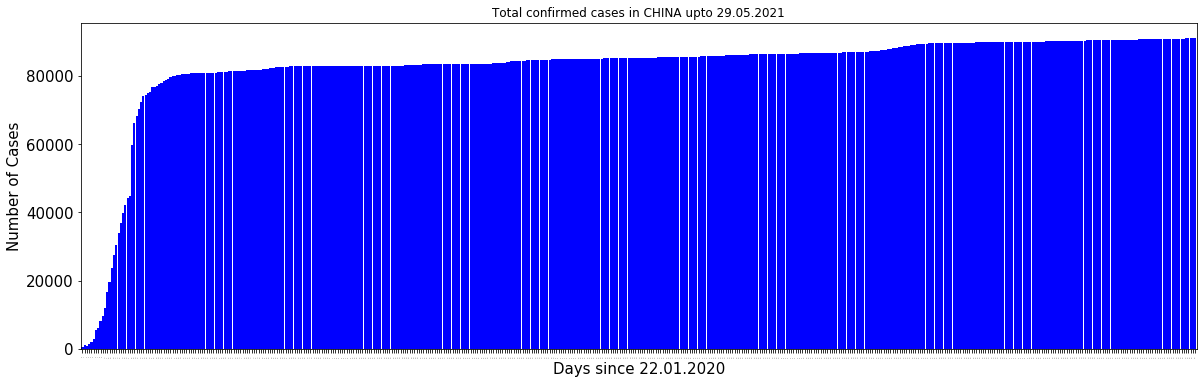

In [69]:
num_plot_china['Confirmed'].plot(kind='bar',width=0.95,figsize=(20,6),title='Total confirmed cases in CHINA upto 29.05.2021',colormap='winter')
plt.xticks(size=0)
plt.yticks(size=15)
plt.ylabel('Number of Cases', size=15)
plt.xlabel('Days since 22.01.2020', size = 15)
plt.show()

**Understanding from the graph : The Total no. of Confirmed cases in China graph shows that the graph is flattened after May, 2020, which shows that the increment in the cases is not exponentially in the recent times as the graph is Flattened**

### Total no. of Recovered cases in China till 29.05.2021

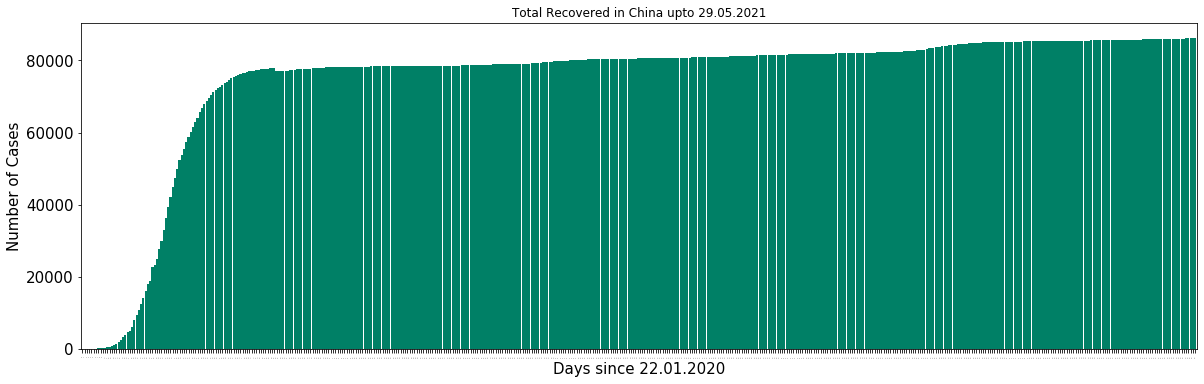

In [70]:
num_plot_china['Recovered'].plot(kind='bar',width=0.95,figsize=(20,6),title='Total Recovered in China upto 29.05.2021',colormap='summer')
plt.xticks(size=0)
plt.yticks(size=15)
plt.ylabel('Number of Cases', size=15)
plt.xlabel('Days since 22.01.2020', size = 15)
plt.show()

### Total no. of Casualties in China till 29.05.2021

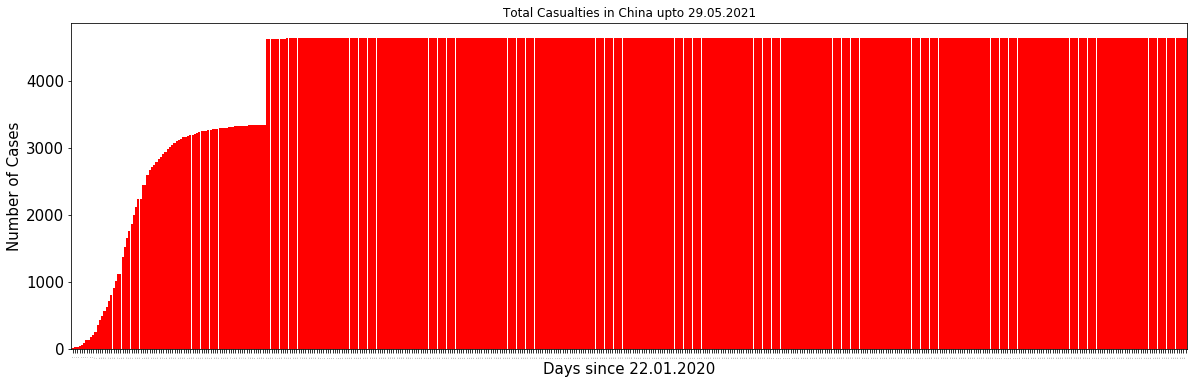

In [71]:
num_plot_china['Deaths'].plot(kind='bar',width=0.95,figsize=(20,6),title='Total Casualties in China upto 29.05.2021',colormap='autumn')
plt.xticks(size=0)
plt.yticks(size=15)
plt.ylabel('Number of Cases', size=15)
plt.xlabel('Days since 22.01.2020', size = 15)
plt.show()

### Confirmed cases increase in China till 29.05.2021

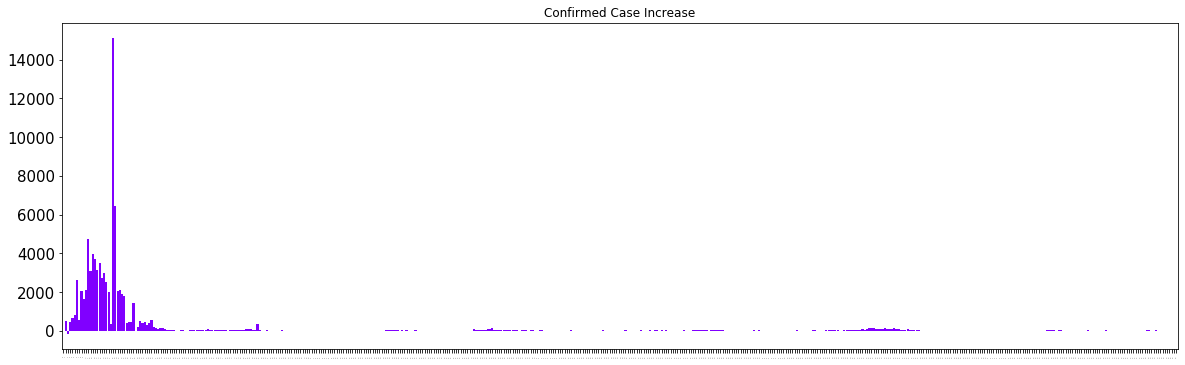

In [59]:
num_plot_china['Confirmed Case Increase'].plot(kind='bar',width=0.95,figsize=(20,6),title='Confirmed Case Increase',colormap='rainbow')
plt.xticks(size=0)
plt.yticks(size=15)
plt.show()

### Death case increase in China till 29.05.2021

From the Death Increase plot for China we can see that deaths have reduced to a great level but on 17th April there were 1290 deaths reported in a single day. China reported this increase as some miscalculation on their end during the initial phase of COVID

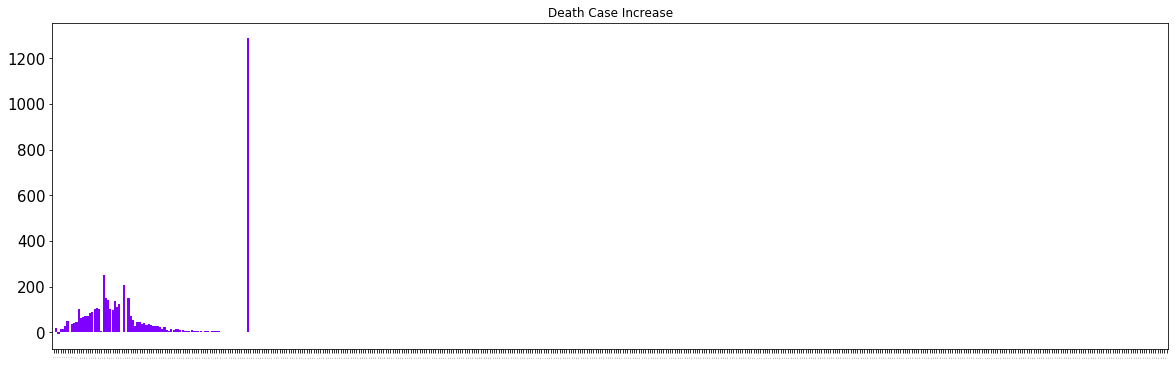

In [60]:
num_plot_china['Death Case Increase'].plot(kind='bar',width=0.95,figsize=(20,6),title='Death Case Increase',colormap='rainbow')
plt.xticks(size=0)
plt.yticks(size=15)
plt.show()

--------------

## C. Per day Statistics for Hubei Province, China [The Major epicentre]

Wuhan was placed under a strict lockdown that lasted 76 days. Public transport was suspended. Soon afterwards, similar measures were implemented in every city in Hubei province. Across the country, 14 000 health checkpoints were established at public transport hubs. School re-openings after the winter vacation were delayed and population movements were severely curtailed. Dozens of cities implemented family outdoor restrictions, which typically meant that only one member of each household was permitted to leave the home every couple of days to collect necessary supplies. Within weeks, China had managed to test 9 million people for SARS-CoV-2 in Wuhan. It set up an effective national system of contact tracing.

We plot the per day statistics for Hubei since it has the highest rate of confirmed cases in China
If we compare the China and Hubei plots, they both are similar. Hence we can say that the China stats are influenced deeply by a single province

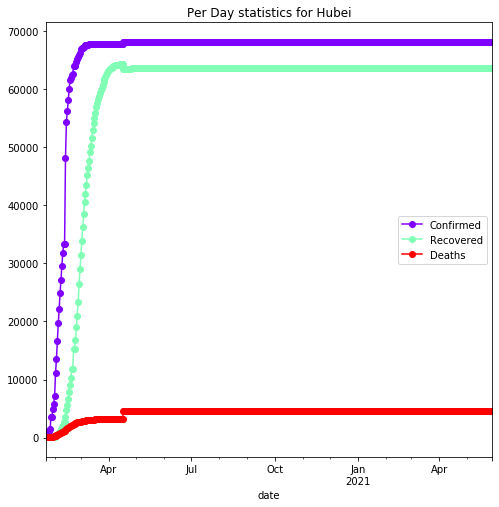

In [30]:
hubei_cases_complete=df.loc[df['Province/State']=='Hubei']
hubei_cases_complete['date'] = hubei_cases_complete['ObservationDate'].dt.date
hubei_cases_complete['date']=pd.to_datetime(hubei_cases_complete['date'])
hubei_cases_complete = hubei_cases_complete[hubei_cases_complete['date'] > pd.Timestamp(date(2020,1,21))]
num_plot = hubei_cases_complete.groupby('date')["Confirmed", "Recovered", "Deaths"].sum()
num_plot.plot(figsize=(8,8),title='Per Day statistics for Hubei',colormap='rainbow',marker='o')
plt.show()

While talking about the China the main root of the epidemic is Hubei Province where the confirmed cases were increased from 10000 to 70000 in a gap of just 25 days in the month of February and March, 2020. The root of the epidemic is hereby **HUBEI province of China**

---------------

# Chapter 2 : World - Excluding China

The 2019 novel coronavirus (2019-nCoV), officially named as COVID-19 pandemic by the WHO, has spread to more than 180 countries including China. Confirmed novel coronavirus cases increased ten-fold in less than a month, from 100,000 in the first week of March to more than one million on 02 April, while more than 52,000 deaths have been reported across the world.

### Per Day Statistics for the World upto 29th May,2021

Global cases are on an exponential increase and the recovery and death cases do show some divergence which is a good indication

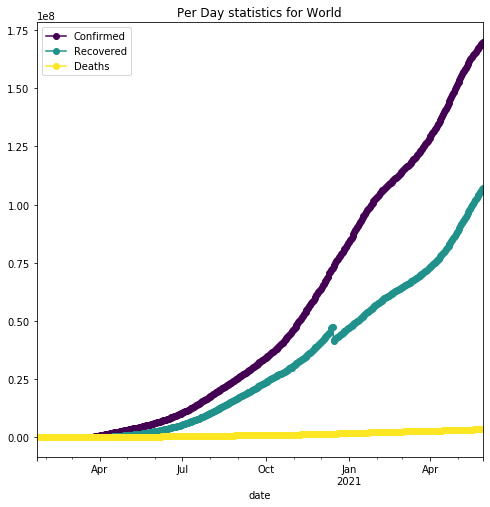

In [31]:
global_cases_complete=df.loc[~(df['Country/Region']=='China')]
global_cases_complete['date'] = global_cases_complete['ObservationDate'].dt.date
global_cases_complete['date']=pd.to_datetime(global_cases_complete['date'])
global_cases_complete = global_cases_complete[global_cases_complete['date'] > pd.Timestamp(date(2020,1,21))]
num_plot = global_cases_complete.groupby('date')["Confirmed", "Recovered", "Deaths"].sum()
num_plot.plot(figsize=(8,8),title='Per Day statistics for World',colormap='viridis',marker='o')
plt.show()

Here the perday statistics tells us the spreading is exponentially increasing day by day since the end of the March, 2020. Now after 5 months later the situation is worser than the previous days and still the cases are increasing exponentially without any kind of stoppings in the increment of the cases.

### Increment in the stats in the recent times (from 8th Aug, 2020 to 29th May, 2021)

In [32]:
num_plot_global=num_plot.reset_index()
num_plot_global['Death Case Increase']=0
num_plot_global['Confirmed Case Increase']=0
num_plot_global['Confirmed Case Increase'][0]=0
num_plot_global['Death Case Increase'][0]=0
for i in range(1,num_plot_global.shape[0]):
    num_plot_global['Confirmed Case Increase'][i]=-(num_plot_global.iloc[i-1][1]-num_plot_global.iloc[i][1])
    num_plot_global['Death Case Increase'][i]=-(num_plot_global.iloc[i-1][3]-num_plot_global.iloc[i][3])
num_plot_global.tail()

,date,Confirmed,Recovered,Deaths,Death Case Increase,Confirmed Case Increase
489,2021-05-25,167757188,104738872,3481152,12752,531832
490,2021-05-26,168325385,105294673,3493908,12756,568197
491,2021-05-27,168879746,105992009,3506661,12753,554361
492,2021-05-28,169379664,106546957,3518481,11820,499918
493,2021-05-29,169860488,107054552,3528983,10502,480824


Here on 29th May, 2021 the number of confirmed cases has raised to 169860488	, which is huge in numbers and almost 70% of the total population of the world. In that confirmed cases the Death toll rises to 3528983 and still it is increasing day by day. 

**Global confirmed cases have been on an increasing trend and this has been largely contributed by Brazil and US at this moment as can be seen in the pie-chart. 29th July saw the highest increase in confirmed cases with 3.37L cases in a day.**

### Total Confirmed Cases in the World (Excluding China) upto 29.05.2021

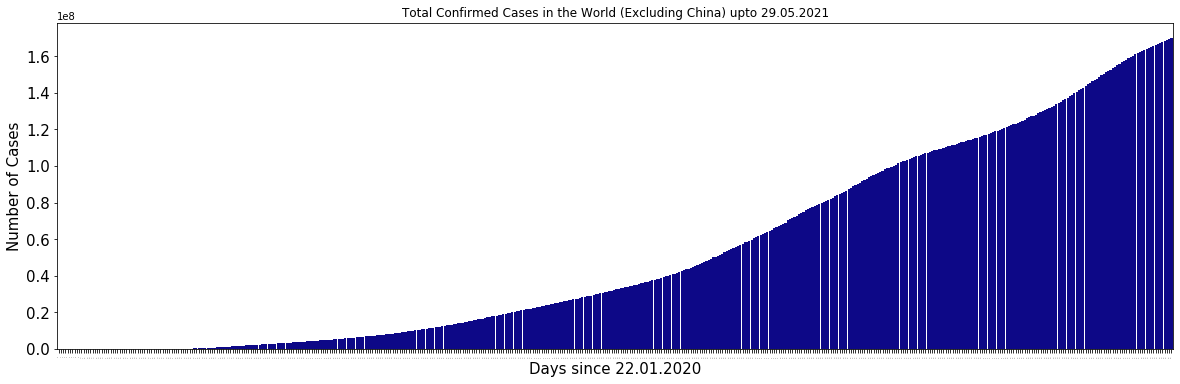

In [64]:
num_plot_global['Confirmed'].plot(kind='bar',width=0.95,figsize=(20,6),title='Total Confirmed Cases in the World (Excluding China) upto 29.05.2021',colormap='plasma')
plt.xticks(size=0)
plt.yticks(size=15)
plt.ylabel('Number of Cases', size=15)
plt.xlabel('Days since 22.01.2020', size = 15)
plt.show()

### Total Recovered Cases in the World (Excluding China) upto 29.05.2021

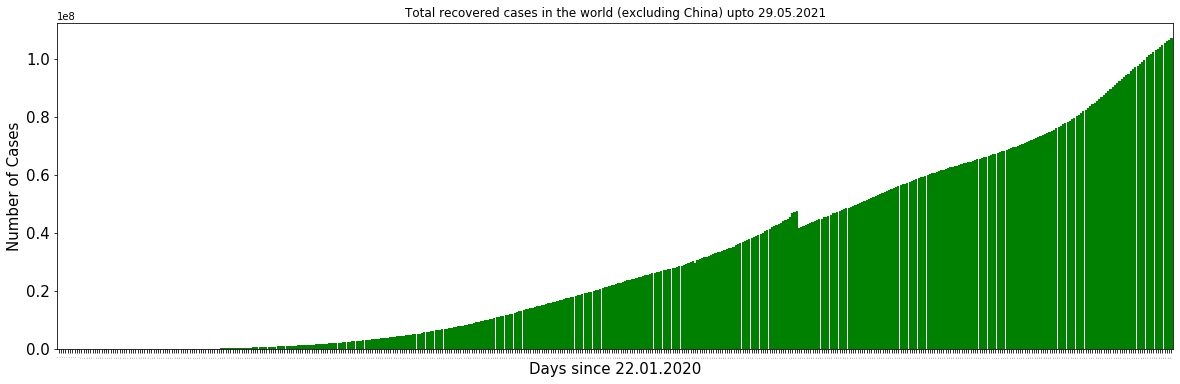

In [65]:
num_plot_global['Recovered'].plot(kind='bar',width=0.95,figsize=(20,6),title='Total recovered cases in the world (excluding China) upto 29.05.2021',colormap='ocean')
plt.xticks(size=0)
plt.yticks(size=15)
plt.ylabel('Number of Cases', size=15)
plt.xlabel('Days since 22.01.2020', size = 15)
plt.show()

### Total Death Cases in the World (Excluding China) upto 29.05.2021

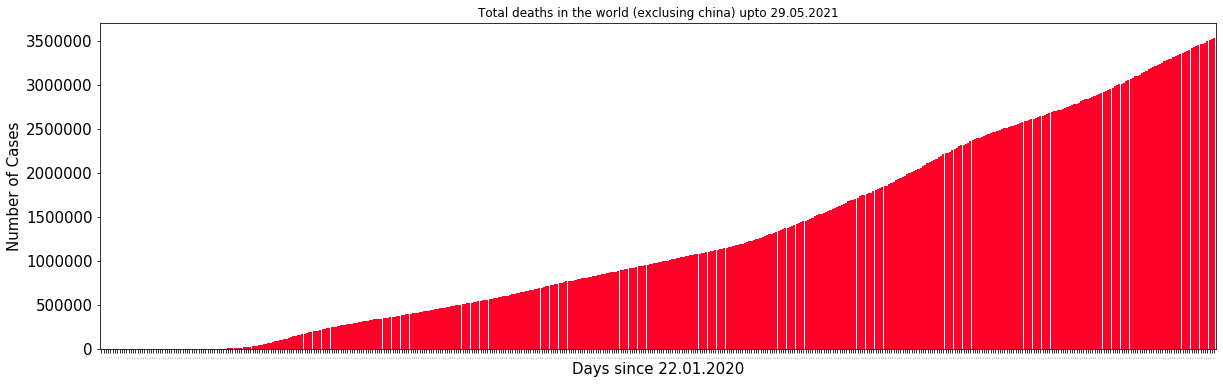

In [66]:
num_plot_global['Deaths'].plot(kind='bar',width=0.95,figsize=(20,6),title='Total deaths in the world (exclusing china) upto 29.05.2021',colormap='gist_rainbow')
plt.xticks(size=0)
plt.yticks(size=15)
plt.ylabel('Number of Cases', size=15)
plt.xlabel('Days since 22.01.2020', size = 15)
plt.show()

### Total Confirmed Cases Increase in the World (Excluding China) upto 29.05.2021

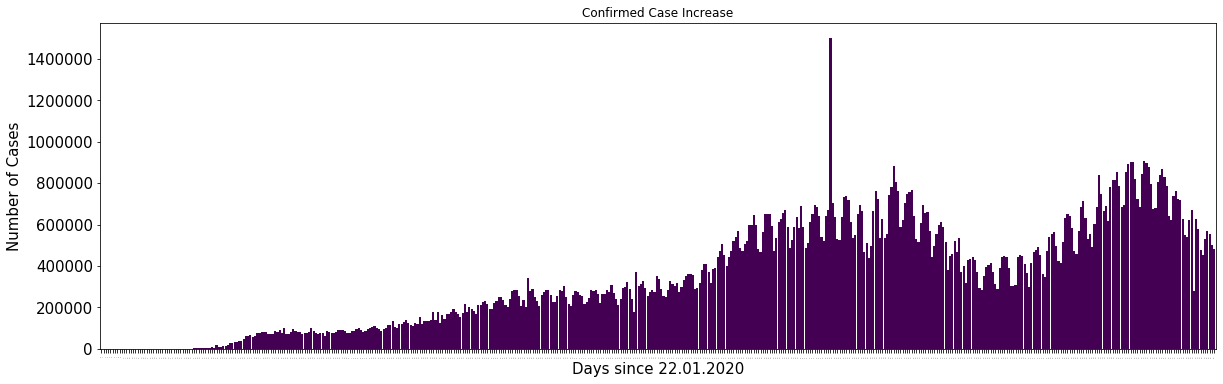

In [67]:
num_plot_global['Confirmed Case Increase'].plot(kind='bar',width=0.95,figsize=(20,6),title='Confirmed Case Increase',colormap='viridis')
plt.xticks(size=0)
plt.yticks(size=15)
plt.ylabel('Number of Cases', size=15)
plt.xlabel('Days since 22.01.2020', size = 15)
plt.show()

### Death Cases Increase in the World (Excluding China) upto 29.05.2021

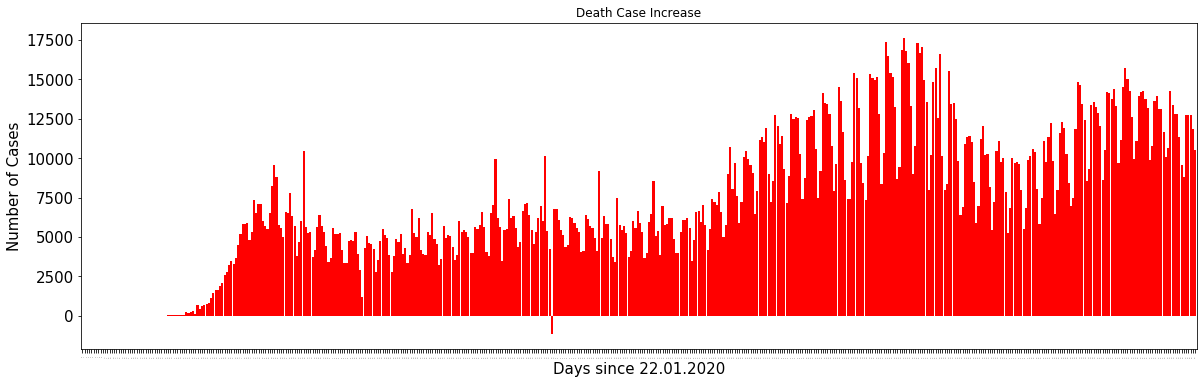

In [68]:
num_plot_global['Death Case Increase'].plot(kind='bar',width=0.95,figsize=(20,6),title='Death Case Increase',colormap='autumn')
plt.xticks(size=0)
plt.yticks(size=15)
plt.ylabel('Number of Cases', size=15)
plt.xlabel('Days since 22.01.2020', size = 15)
plt.show()


Death cases have also been on the rise globally as seen below. 29th April has seen a drastic increase in the number of deaths in a single day(10485).

************************

# Chapter 3 : Analysis of Major Countries

## A. ITALY - 2nd Epicentre

First outbreak: Italy was first affected with COVID 19 in 30 January, when two positive cases were reported in Chinese tourists. Italy COVID cases reached 59,138 on 23 March, marking the biggest coronavirus outbreak outside Asia. And Italy was announced as second most affected coronavirus country in the world with the cases increasing at a higher rate than any other country.
Total affected: If we see the graph of affected rate, we can understand the cases were approximately same upto August 25. After that it has been increasing and currently it has 1455022 positive cases by now(Till 24 november, 2020).
Death rate: The death rate was suddenly increased in the mid of March and it was approximately in a equal level till October 20. After that is has been increasing like the affected rate till now. The daily death cases were too high from last week of February to mid of April. 


**Italy was the second epicentre for COVID19,hence lets look at these numbers. The numbers are high and confirmed cases are increasing by the day. However the increase rate for confirmed cases has been constant and may soon be seeing a plateau phase. Recovery and deaths were both neck to neck with some divergence over the last few days.Italy has more than 1L confirmed cases on 30th March**


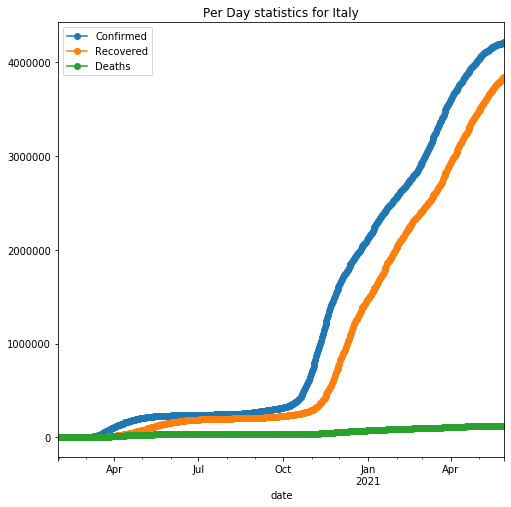

In [38]:
italy_cases_complete=df.loc[df['Country/Region']=='Italy']
italy_cases_complete['date'] = italy_cases_complete['ObservationDate'].dt.date
italy_cases_complete['date']=pd.to_datetime(italy_cases_complete['date'])
italy_cases_complete = italy_cases_complete[italy_cases_complete['date'] > pd.Timestamp(date(2020,1,21))]
num_plot = italy_cases_complete.groupby('date')["Confirmed", "Recovered", "Deaths"].sum()
num_plot.plot(figsize=(8,8),title='Per Day statistics for Italy',marker='o')
plt.show()

In [39]:
num_plot_italy=num_plot.reset_index()
num_plot_italy['Death Case Increase']=0
num_plot_italy['Confirmed Case Increase']=0
num_plot_italy['Confirmed Case Increase'][0]=0
num_plot_italy['Death Case Increase'][0]=0
for i in range(1,num_plot_italy.shape[0]):
    num_plot_italy['Confirmed Case Increase'][i]=-(num_plot_italy.iloc[i-1][1]-num_plot_italy.iloc[i][1])
    num_plot_italy['Death Case Increase'][i]=-(num_plot_italy.iloc[i-1][3]-num_plot_italy.iloc[i][3])
num_plot_italy.tail()

,date,Confirmed,Recovered,Deaths,Death Case Increase,Confirmed Case Increase
480,2021-05-25,4197892,3804246,125501,166,3220
481,2021-05-26,4201827,3816176,125622,121,3935
482,2021-05-27,4205970,3826984,125793,171,4143
483,2021-05-28,4209707,3837518,125919,126,3737
484,2021-05-29,4213055,3845087,126002,83,3348


For Italy the increase in confirmed cases have been in the range of 3000-4000 for the past few days.

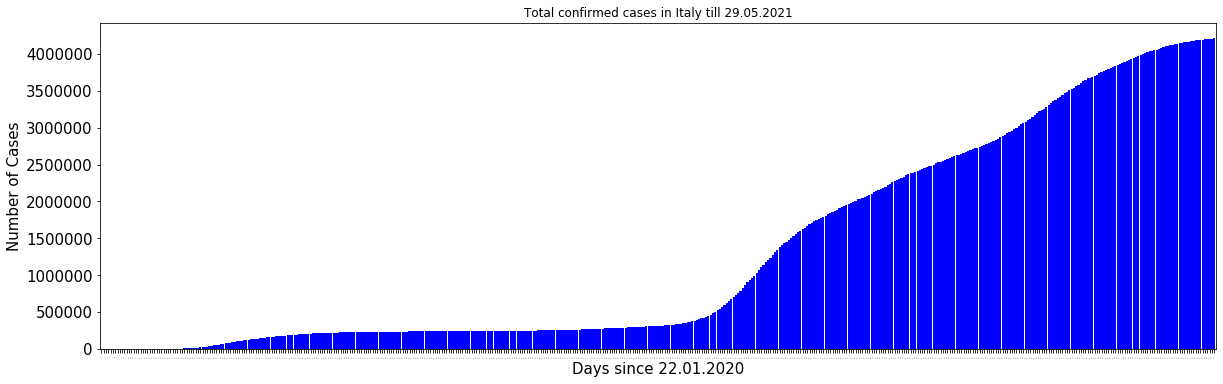

In [72]:
num_plot_italy['Confirmed'].plot(kind='bar',width=0.95,figsize=(20,6),title='Total confirmed cases in Italy till 29.05.2021',colormap = 'winter')
plt.xticks(size=0)
plt.yticks(size=15)
plt.ylabel('Number of Cases', size=15)
plt.xlabel('Days since 22.01.2020', size = 15)

plt.show()

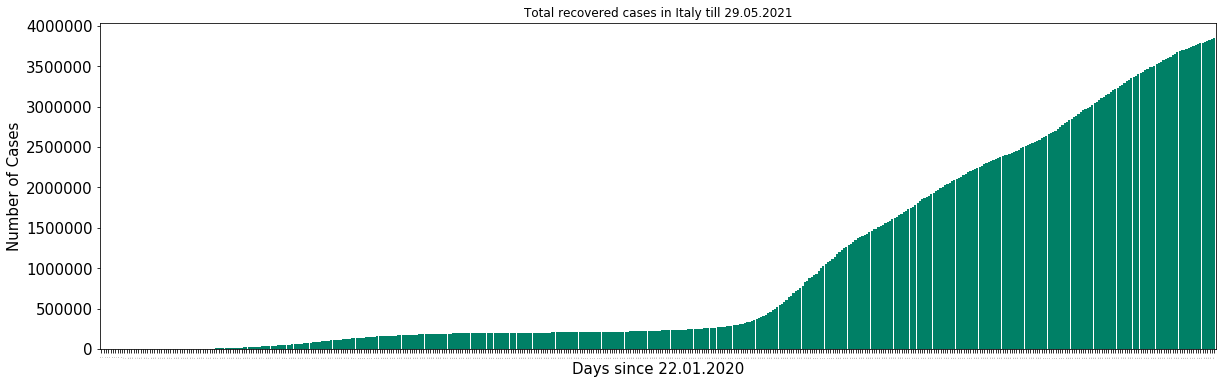

In [73]:
num_plot_italy['Recovered'].plot(kind='bar',width=0.95,figsize=(20,6),title='Total recovered cases in Italy till 29.05.2021',colormap = 'summer')
plt.xticks(size=0)
plt.yticks(size=15)
plt.ylabel('Number of Cases', size=15)
plt.xlabel('Days since 22.01.2020', size = 15)
plt.show()

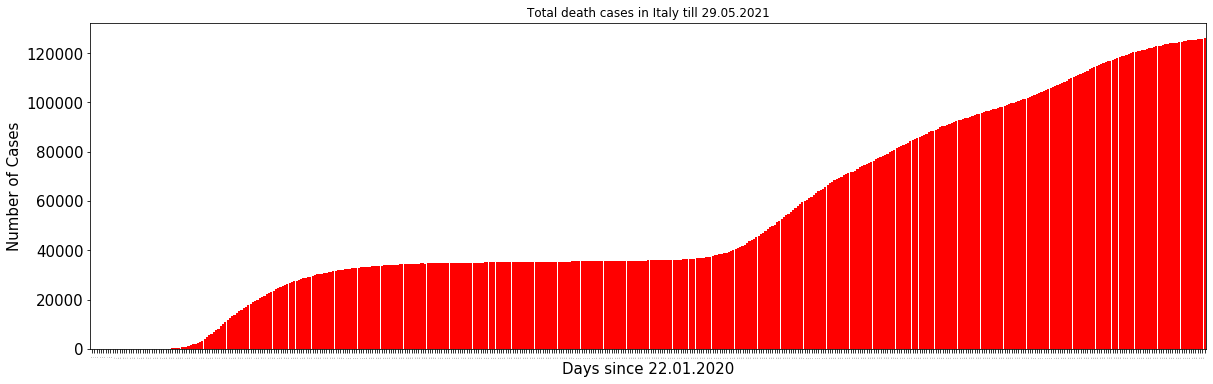

In [74]:
num_plot_italy['Deaths'].plot(kind='bar',width=0.95,figsize=(20,6),title='Total death cases in Italy till 29.05.2021',colormap = 'autumn')
plt.xticks(size=0)
plt.yticks(size=15)
plt.ylabel('Number of Cases', size=15)
plt.xlabel('Days since 22.01.2020', size = 15)
plt.show()

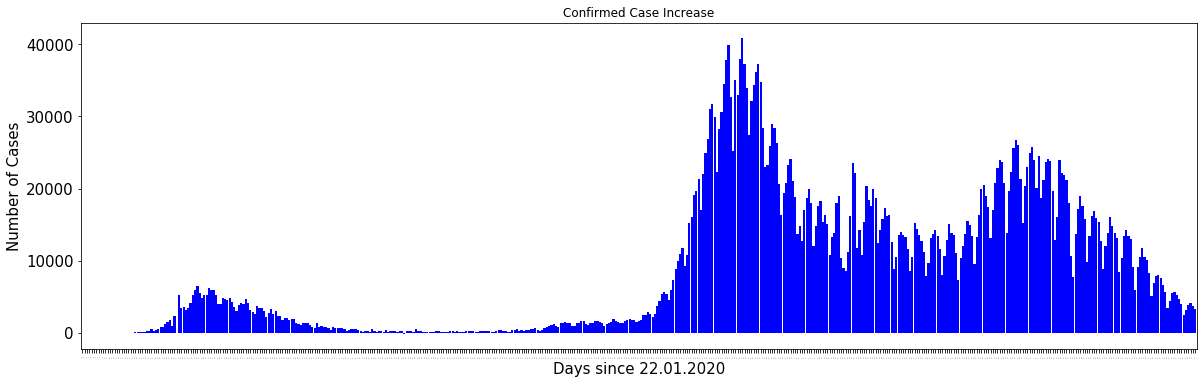

In [75]:
num_plot_italy['Confirmed Case Increase'].plot(kind='bar',width=0.95,figsize=(20,6),title='Confirmed Case Increase',colormap = 'winter')
plt.xticks(size=0)
plt.yticks(size=15)
plt.ylabel('Number of Cases', size=15)
plt.xlabel('Days since 22.01.2020', size = 15)
plt.show()

**The highest number of deaths in Italy was seen on 27th March with 919 deaths reported**

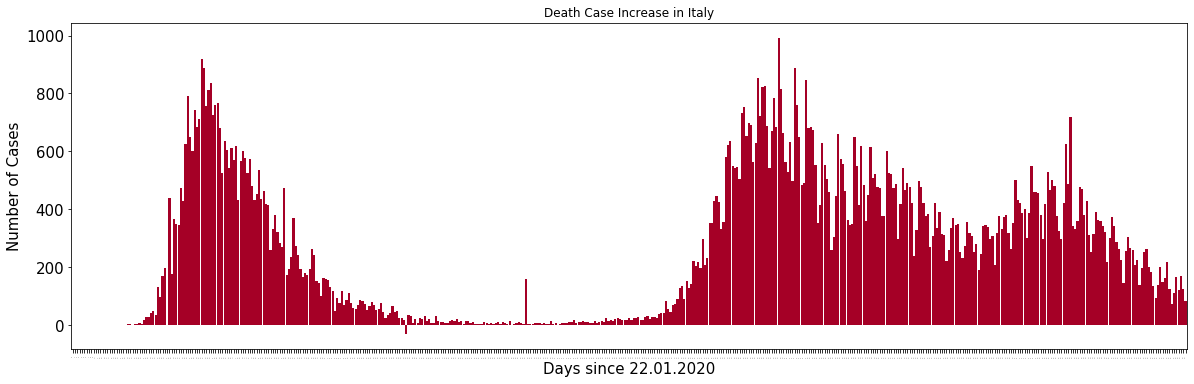

In [76]:
num_plot_italy['Death Case Increase'].plot(kind='bar',width=0.95,figsize=(20,6),title='Death Case Increase in Italy',colormap = 'RdYlBu')
plt.xticks(size=0)
plt.yticks(size=15)
plt.ylabel('Number of Cases', size=15)
plt.xlabel('Days since 22.01.2020', size = 15)
plt.show()

**Understanding from the graph** : The daily basis curve for both the confirmed and death cases increment shows that the country had suffered third wave of Covid surge, till 29th May, 2021 and still the country is suffering despite of the stric procedures followed by the country. The first wave for Italy was the deadliest and the time gap between the second and third wave shows that how deadly can be this virus be. Fortunately the third wave is ending for Italy as the curve comes down at the end of the month May, 2021. But the country is one of the worst suffered countries in the world due to Covid-19 pandemic

*************************

## B. USA - 3rd Epicentre

First outbreak:  Covid was first identified in USA in December 2019. The World Health Organization declared the outbreak a Public Health Emergency of International Concern in January 2020 and a pandemic in March 2020. 

Total affected: Positive cases till May 29, 2021 is 33251939	. Cases are respectively higher in October than last few months. Rate of confirmed cases is daily changing.

Death rate: Total number of death 255850. In November 21, number of death was 2036 in 25 it was 1052. Death rate is decreasing and it is less than the number of death in March to mid May.


*US was reaching flattening of curve stage, however last few days have again seen an increase in cases as can be seen below*

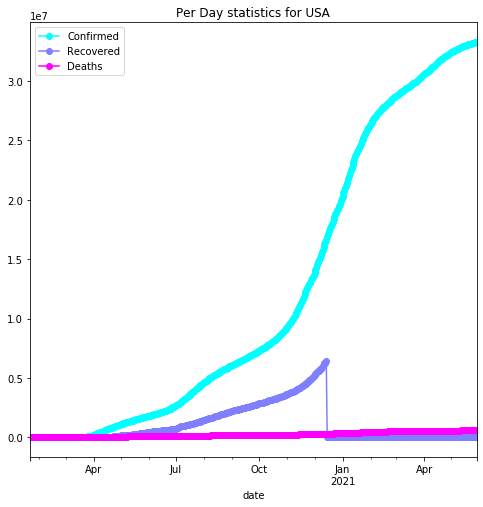

In [45]:
us_cases_complete=df.loc[df['Country/Region']=='US']
us_cases_complete['date'] = us_cases_complete['ObservationDate'].dt.date
us_cases_complete['date']=pd.to_datetime(us_cases_complete['date'])
us_cases_complete = us_cases_complete[us_cases_complete['date'] > pd.Timestamp(date(2020,1,21))]
num_plot = us_cases_complete.groupby('date')["Confirmed", "Recovered", "Deaths"].sum()
num_plot.plot(figsize=(8,8),title='Per Day statistics for USA',colormap='cool',marker='o')
plt.show()

In [46]:
num_plot_us=num_plot.reset_index()
num_plot_us['Death Case Increase']=0
num_plot_us['Confirmed Case Increase']=0
num_plot_us['Confirmed Case Increase'][0]=0
num_plot_us['Death Case Increase'][0]=0
for i in range(1,num_plot_us.shape[0]):
    num_plot_us['Confirmed Case Increase'][i]=-(num_plot_us.iloc[i-1][1]-num_plot_us.iloc[i][1])
    num_plot_us['Death Case Increase'][i]=-(num_plot_us.iloc[i-1][3]-num_plot_us.iloc[i][3])
num_plot_us.tail()

,date,Confirmed,Recovered,Deaths,Death Case Increase,Confirmed Case Increase
489,2021-05-25,33166418,0,590941,621,22756
490,2021-05-26,33190470,0,591950,1009,24052
491,2021-05-27,33217995,0,593288,1338,27525
492,2021-05-28,33239963,0,593963,675,21968
493,2021-05-29,33251939,0,594306,343,11976


**On 16th July the confirmed case increase reached a peak of 78k in a day. Every 7 days we noticed a peak in the numbers previously however the peak nowadays occurs in 4-5 days.**

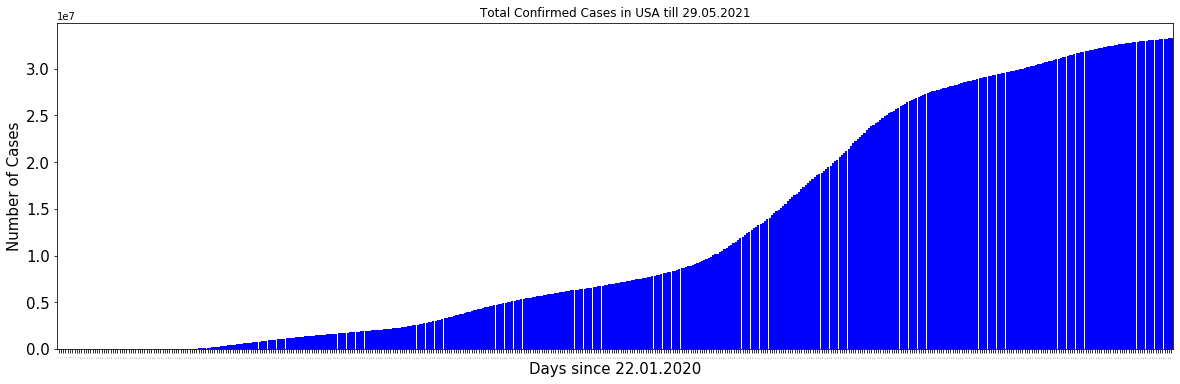

In [77]:
num_plot_us['Confirmed'].plot(kind='bar',width=0.95,figsize=(20,6),colormap='winter',title='Total Confirmed Cases in USA till 29.05.2021')
plt.xticks(size=0)
plt.yticks(size=15)
plt.ylabel('Number of Cases', size=15)
plt.xlabel('Days since 22.01.2020', size = 15)
plt.show()

This graph shows a certain flatness in the mid of June, 2020, But after that it is in the upswing mode with a steep slope upwards 

The Death toll in United States is not flatten any more rather it is increasing day by day in a exponential manner with a steep slope upwards. It does not have any kind of peak till now so that it can flatten after a particular peak.

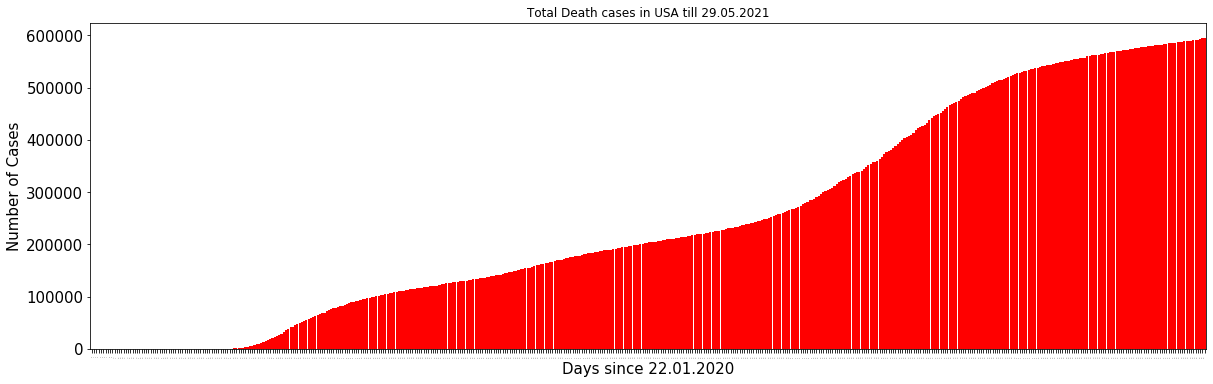

In [78]:
num_plot_us['Deaths'].plot(kind='bar',width=0.95,figsize=(20,6),colormap='autumn',title='Total Death cases in USA till 29.05.2021')
plt.xticks(size=0)
plt.yticks(size=15)
plt.ylabel('Number of Cases', size=15)
plt.xlabel('Days since 22.01.2020', size = 15)
plt.show()

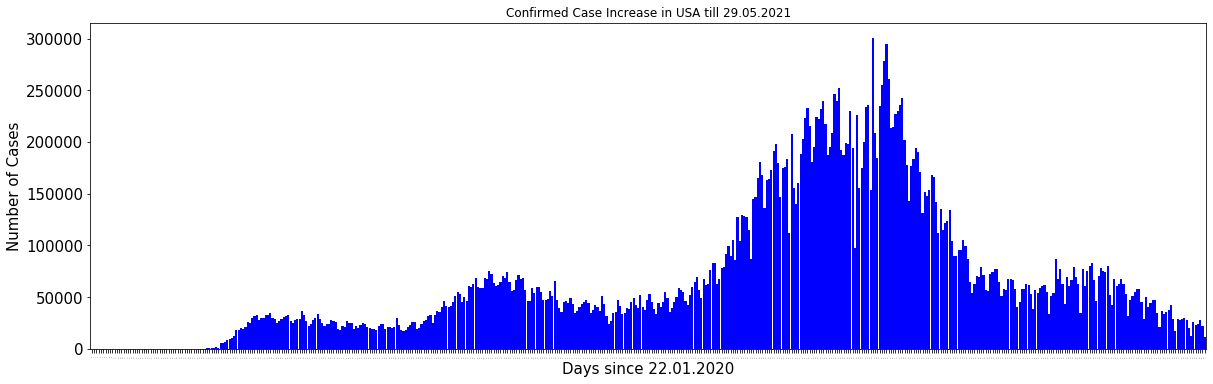

In [84]:
num_plot_us['Confirmed Case Increase'].plot(kind='bar',width=0.95,figsize=(20,6),colormap='winter',title='Confirmed Case Increase in USA till 29.05.2021')
plt.xticks(size=0)
plt.yticks(size=15)
plt.ylabel('Number of Cases', size=15)
plt.xlabel('Days since 22.01.2020', size = 15)
plt.show()

**In the mid of June the confirmed cases are decreased and the incrementation is flattened by a certain moment. But unfortunately in the last week July the incrementation in the confirmed cases are increased suddenly with a steep slope. After a week of steep slope in the increment of the confirmed cases there is a decrement in the confirmed cases in a daily basis manner. As we can see in the graph, that after a week of high rise the peaks are coming lower and lower day by day. Which shows that the confirmed cases and decrementing day by day slowly. It's really a big sign of improvement for United States. But then it comes the small fourth wave of Covid surge in USA, the confirmed cases counts again increased by a large number. USA is the only country which has shown the fourth wave of Covid-19 pandemic.**

**Similar increase has been seen in the deaths reported by US with highest number of deaths(4591) recorded on 16th April**

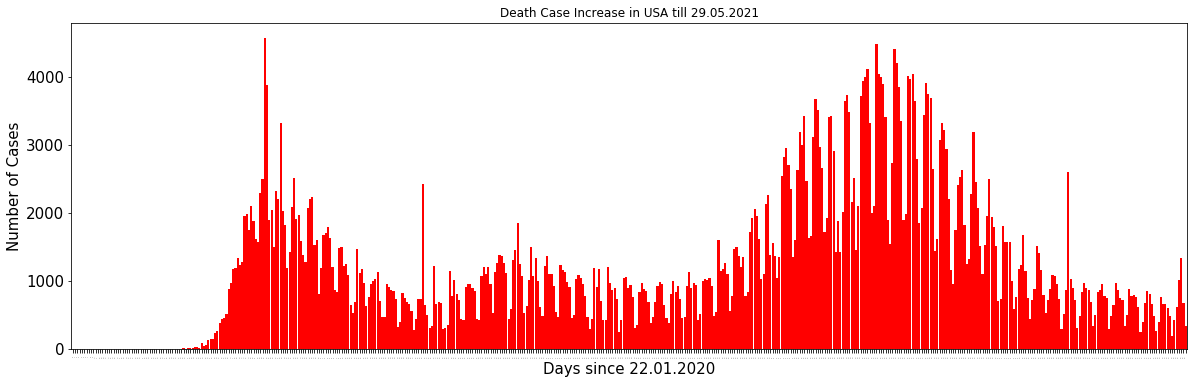

In [85]:
num_plot_us['Death Case Increase'].plot(kind='bar',width=0.95,figsize=(20,6),colormap='autumn',title='Death Case Increase in USA till 29.05.2021')
plt.xticks(size=0)
plt.yticks(size=15)
plt.ylabel('Number of Cases', size=15)
plt.xlabel('Days since 22.01.2020', size = 15)
plt.show()

**As the graph shows that on the particular day of 16th April 2020 USA reported a highest no. of death cases. After that the death cases are slowly coming down to a certain limit but suddenly in the recent times the Death cases are increasing day by day which is very much annoying for USA. As you can observe from the graph that USA is having the fourth wave on going, the first wave caused the damage more because it affected the country in a short amount of time, then a follow up second wave hit USA, and at the end of the December, 2020 the third wave of the pandemic hit hard the country and caused more casualities than any other wave of covid surge. The country is suffering from the fourth wave of covid surge.**

***************************

## C. South Korea - The Most successful country to fight against Covid - 19 goes down!

First outbreak: First conferm case was founded in south koria on 20 January 2020. The number of confermed cases increased after 10 February.

Total affected: In present situation the total cases is 139975.Cases are increasing after February in a linear scale. Daily number of new cases was too high in February then it was reduced, after August 16 to September mid it was extremely high. 

Death rate: Number of death cases are increasing from February but daily death was in the top level in mid of March. Total number of death is 1975 till May 29, 2021, and recovery number is 130381.


### Per Day Statistics for South Korea till 29th May, 2021

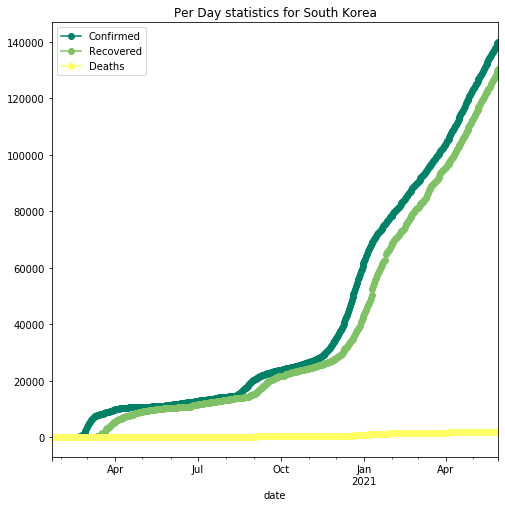

In [81]:
skorea_cases_complete=df.loc[df['Country/Region']=='South Korea']
skorea_cases_complete['date'] = skorea_cases_complete['ObservationDate'].dt.date
skorea_cases_complete['date']=pd.to_datetime(skorea_cases_complete['date'])
skorea_cases_complete = skorea_cases_complete[skorea_cases_complete['date'] > pd.Timestamp(date(2020,1,21))]
num_plot = skorea_cases_complete.groupby('date')["Confirmed", "Recovered", "Deaths"].sum()
num_plot.plot(figsize=(8,8),title='Per Day statistics for South Korea',colormap='summer',marker='o')
plt.show()

### No. of Informed cases in the recent times 

In [82]:
num_plot_skorea=num_plot.reset_index()
num_plot_skorea['Death Case Increase']=0
num_plot_skorea['Confirmed Case Increase']=0
num_plot_skorea['Confirmed Case Increase'][0]=0
num_plot_skorea['Death Case Increase'][0]=0
for i in range(1,num_plot_skorea.shape[0]):
    num_plot_skorea['Confirmed Case Increase'][i]=-(num_plot_skorea.iloc[i-1][1]-num_plot_skorea.iloc[i][1])
    num_plot_skorea['Death Case Increase'][i]=-(num_plot_skorea.iloc[i-1][3]-num_plot_skorea.iloc[i][3])
num_plot_skorea.tail()

,date,Confirmed,Recovered,Deaths,Death Case Increase,Confirmed Case Increase
489,2021-05-25,137682,127582,1940,2,699
490,2021-05-26,138311,128180,1943,3,629
491,2021-05-27,138898,128761,1946,3,587
492,2021-05-28,139431,129739,1951,5,533
493,2021-05-29,139910,130381,1957,6,479


**In the recent times if we check out the no. of Confirmed case Increase, we can find that the cases are bearly minor as compared to the whole world. And the Death Case Increment is now down to 0 in the recent times. Which shows that SOUTH KOREA is able to fought against the virus with minimum casualties of 1957 till 29th May, 2021** 

### Total no. of Confirmed cases in South Korea till 29th May, 2021

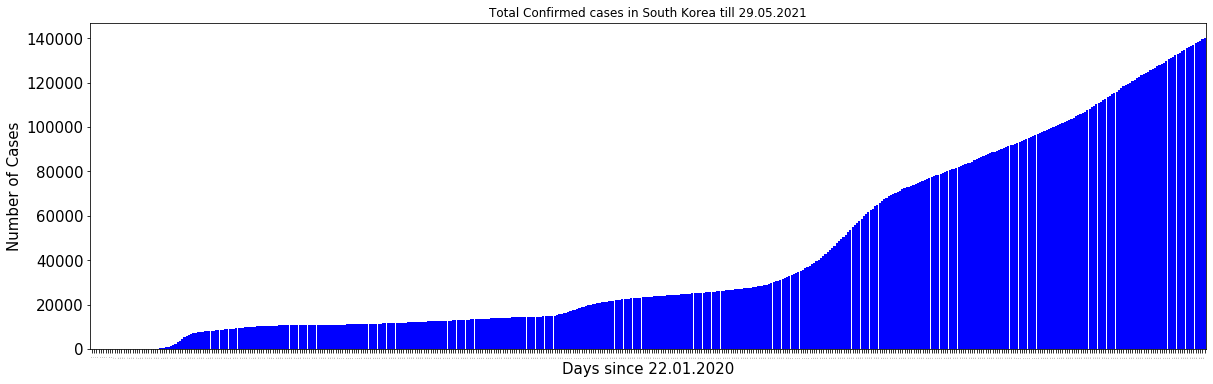

In [86]:
num_plot_skorea['Confirmed'].plot(kind='bar',width=0.95,figsize=(20,6),colormap='winter',title='Total Confirmed cases in South Korea till 29.05.2021')
plt.xticks(size=0)
plt.yticks(size=15)
plt.ylabel('Number of Cases', size=15)
plt.xlabel('Days since 22.01.2020', size = 15)
plt.show()

### Total no. of Recovered cases in South Korea till 29th May, 2021

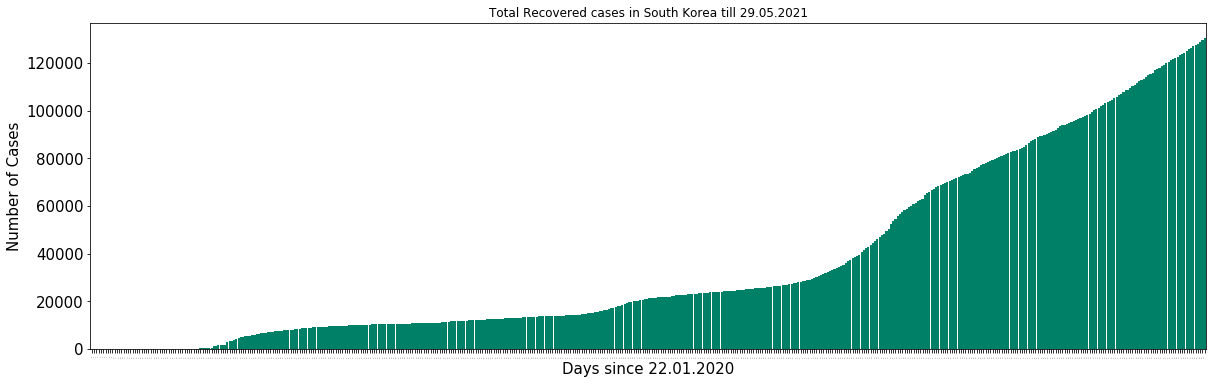

In [88]:
num_plot_skorea['Recovered'].plot(kind='bar',width=0.95,figsize=(20,6),colormap='summer',title='Total Recovered cases in South Korea till 29.05.2021')
plt.xticks(size=0)
plt.yticks(size=15)
plt.ylabel('Number of Cases', size=15)
plt.xlabel('Days since 22.01.2020', size = 15)
plt.show()

### Total no. Death Cases in South Korea till 29th May, 2021

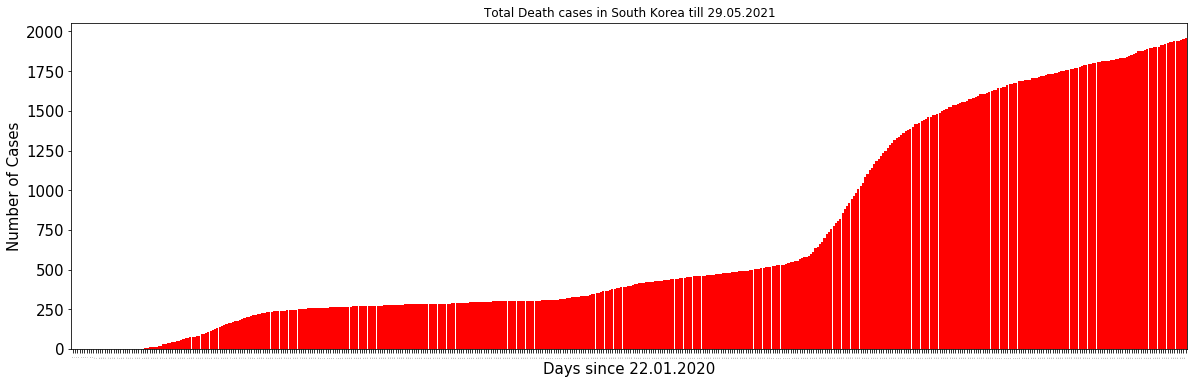

In [89]:
num_plot_skorea['Deaths'].plot(kind='bar',width=0.95,figsize=(20,6),colormap='autumn',title='Total Death cases in South Korea till 29.05.2021')
plt.xticks(size=0)
plt.yticks(size=15)
plt.ylabel('Number of Cases', size=15)
plt.xlabel('Days since 22.01.2020', size = 15)
plt.show()

### Confirm case increment in South Korea till 29th May, 2021

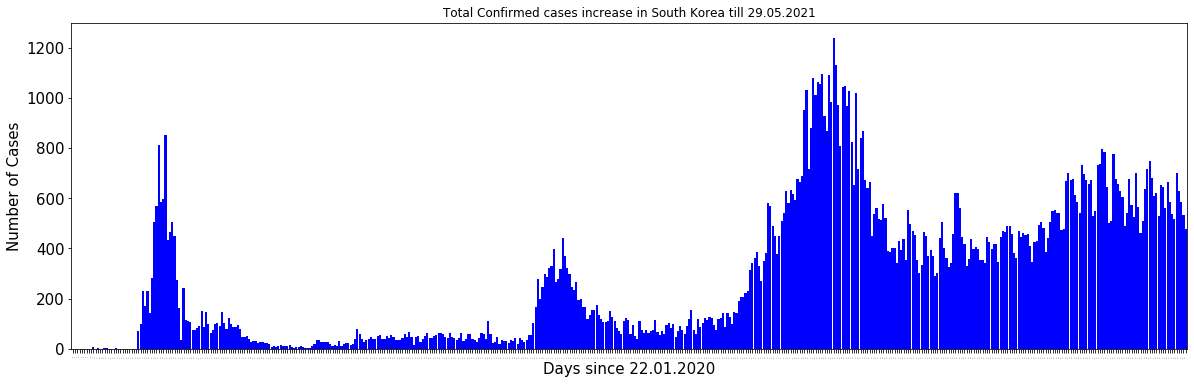

In [90]:
num_plot_skorea['Confirmed Case Increase'].plot(kind='bar',width=0.95,figsize=(20,6),colormap='bwr',title='Total Confirmed cases increase in South Korea till 29.05.2021')
plt.xticks(size=0)
plt.yticks(size=15)
plt.ylabel('Number of Cases', size=15)
plt.xlabel('Days since 22.01.2020', size = 15)
plt.show()

### Death case increment in South Korea till  29th May, 2021

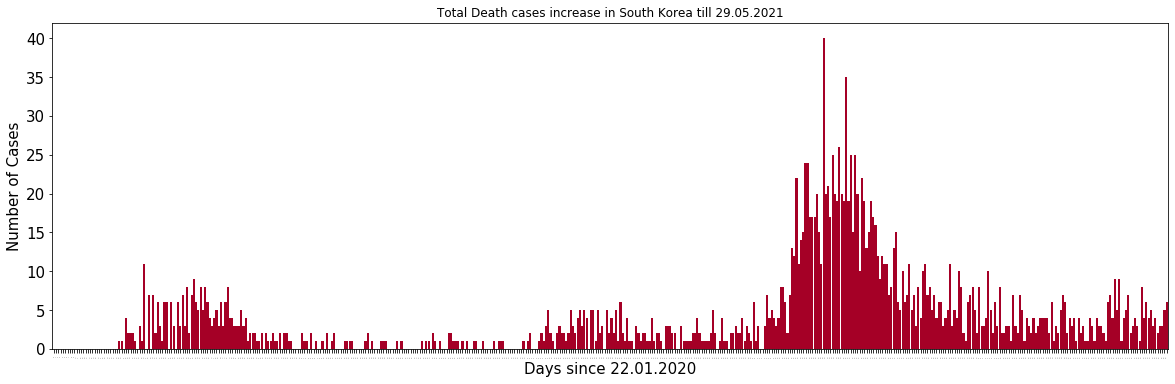

In [91]:
num_plot_skorea['Death Case Increase'].plot(kind='bar',width=0.95,figsize=(20,6),colormap='RdYlBu',title='Total Death cases increase in South Korea till 29.05.2021')
plt.xticks(size=0)
plt.yticks(size=15)
plt.ylabel('Number of Cases', size=15)
plt.xlabel('Days since 22.01.2020', size = 15)
plt.show()

**Observation on South Korea**

While the virus was ravaging Western Europe and North America through much of 2020, South Korea had crushed the curve. Spread was low and the government was riding high in the polls as the population backed their leadership. But a year on, the picture is very different. The country is on the edge of a dangerous new wave of the virus, with highly infectious variants circulating in the population. While the US has vaccinated more than half its adults, only 3 million South Koreans, out of a population of more than 51 million, have received a dose of vaccine, according to the Korea Disease and Prevention Agency. Less than 200,000 people have received the recommended two doses. Again for South Korea it seems like everything is ok for them and they have overcome the situation and then at that very moment the pandemic hit hard again. They have seen the fourth wave till date, and also suffering from this pandemic

****************************

## D. United Kingdom - Recovered from Covid-19 or not?

First outbreak: The virus reached the country in late January 2020. The world's eighth-highest death rate per hundred thousand populations and the highest number overall in Europe.

Total affected: As of 2 November 2020 there have been 1,256,725 confirmed cases.Number of cases is highly increasing after September 6(2020). Number of daily affected cases is much higher than mid july-August.

Death rate: After March death rate was suddenly increased. Total death case is 56533 till 25 November. In November 21 new death was 341 in 22 it was 398. Only in 25 November number of death was 696.


### Per Day Statistics for United Kingdom till 29th May, 2021

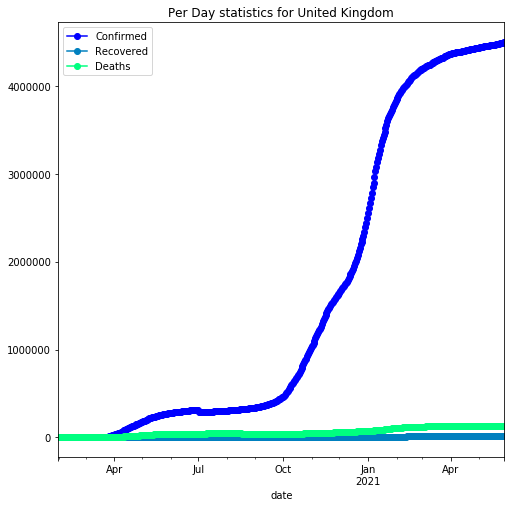

In [92]:
uk_cases_complete=df.loc[df['Country/Region']=='UK']
uk_cases_complete['date'] = uk_cases_complete['ObservationDate'].dt.date
uk_cases_complete['date']=pd.to_datetime(uk_cases_complete['date'])
uk_cases_complete = uk_cases_complete[uk_cases_complete['date'] > pd.Timestamp(date(2020,1,21))]
num_plot = uk_cases_complete.groupby('date')["Confirmed", "Recovered", "Deaths"].sum()
num_plot.plot(figsize=(8,8),title='Per Day statistics for United Kingdom',colormap='winter',marker='o')
plt.show()

### Cases reported in last few days in UK

In [93]:
num_plot_uk=num_plot.reset_index()
num_plot_uk['Death Case Increase']=0
num_plot_uk['Confirmed Case Increase']=0
num_plot_uk['Confirmed Case Increase'][0]=0
num_plot_uk['Death Case Increase'][0]=0
for i in range(1,num_plot_uk.shape[0]):
    num_plot_uk['Confirmed Case Increase'][i]=-(num_plot_uk.iloc[i-1][1]-num_plot_uk.iloc[i][1])
    num_plot_uk['Death Case Increase'][i]=-(num_plot_uk.iloc[i-1][3]-num_plot_uk.iloc[i][3])
    if (num_plot_uk['Death Case Increase'][i]<0):
        num_plot_uk['Death Case Increase'][i]=0
num_plot_uk.tail()

,date,Confirmed,Recovered,Deaths,Death Case Increase,Confirmed Case Increase
480,2021-05-25,4483177,15453,128001,15,2417
481,2021-05-26,4486168,15477,128010,9,2991
482,2021-05-27,4489552,15480,128020,10,3384
483,2021-05-28,4493582,15480,128030,10,4030
484,2021-05-29,4496823,15481,128037,7,3241


### Total Confirmed Cases in UK till  29th May, 2021

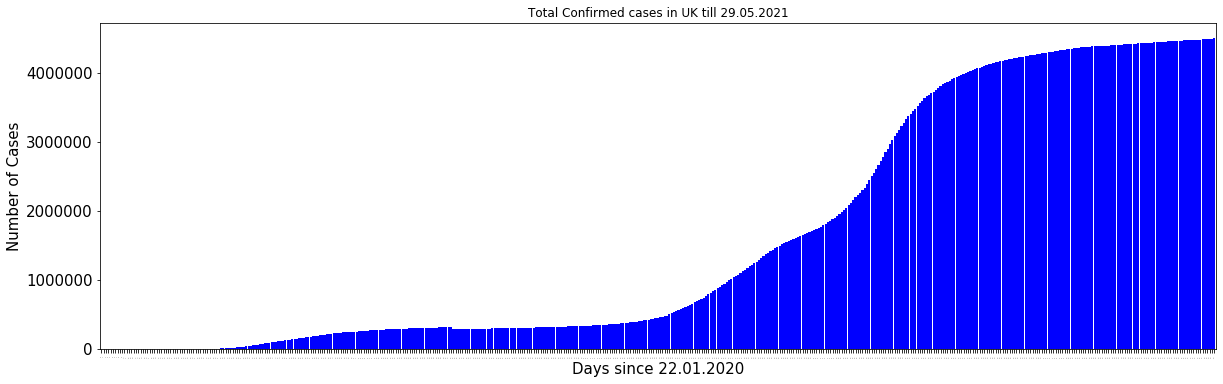

In [94]:
num_plot_uk['Confirmed'].plot(kind='bar',width=0.95,figsize=(20,6),colormap='winter',title='Total Confirmed cases in UK till 29.05.2021')
plt.xticks(size=0)
plt.yticks(size=15)
plt.ylabel('Number of Cases', size=15)
plt.xlabel('Days since 22.01.2020', size = 15)
plt.show()

### Total Recovered cases in UK till  29th May, 2021

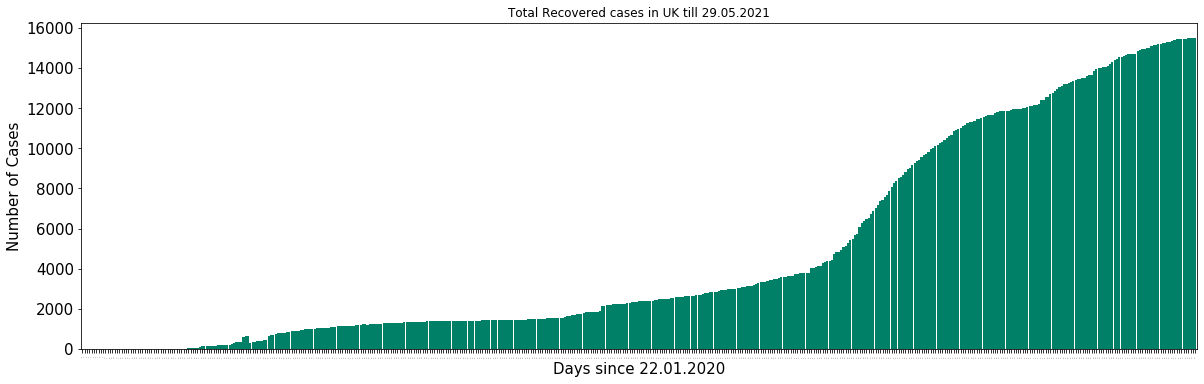

In [95]:
num_plot_uk['Recovered'].plot(kind='bar',width=0.95,figsize=(20,6),colormap='summer',title='Total Recovered cases in UK till 29.05.2021')
plt.xticks(size=0)
plt.yticks(size=15)
plt.ylabel('Number of Cases', size=15)
plt.xlabel('Days since 22.01.2020', size = 15)
plt.show()

### Total Casualties in UK till  29th May, 2021

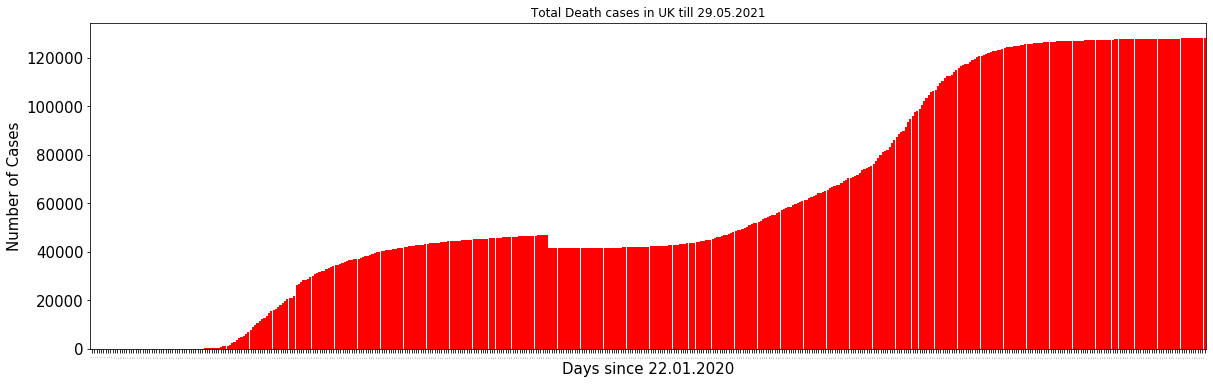

In [96]:
num_plot_uk['Deaths'].plot(kind='bar',width=0.95,figsize=(20,6),colormap='autumn',title='Total Death cases in UK till 29.05.2021')
plt.xticks(size=0)
plt.yticks(size=15)
plt.ylabel('Number of Cases', size=15)
plt.xlabel('Days since 22.01.2020', size = 15)
plt.show()

**From the Plottings we can clearly observe that the confirmed, recovered and death tolls are flattened pretty much. Which signifies that UK is pretty much controlled the situation**

### Death Cases increased in UK till  29th May, 2021 

**From the analysis we can observe that after the certain stage of the pandemic situation the number of confirmed cases are decreased and level up at a certain range. In the recent days the cases are reported near about 100**

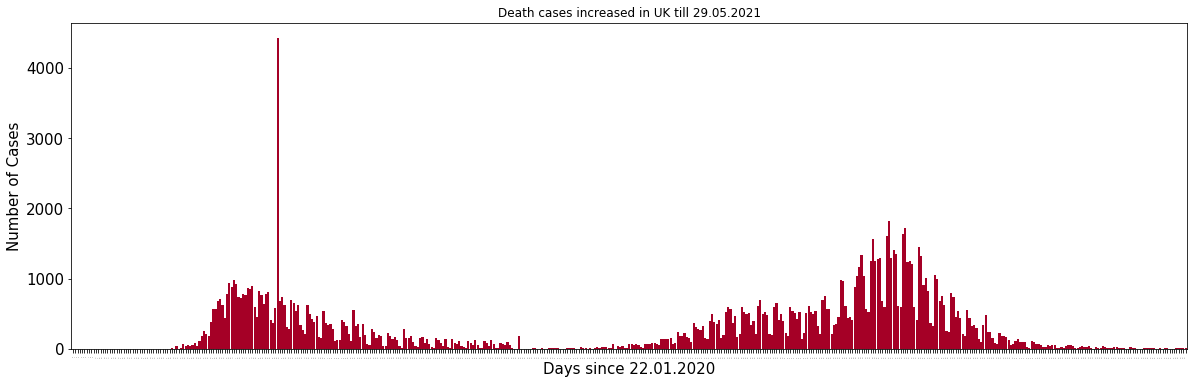

In [97]:
num_plot_uk['Death Case Increase'].plot(kind='bar',width=0.95,figsize=(20,6),colormap='RdYlBu',title='Death cases increased in UK till 29.05.2021')
plt.xticks(size=0)
plt.yticks(size=15)
plt.ylabel('Number of Cases', size=15)
plt.xlabel('Days since 22.01.2020', size = 15)
plt.show()

**From the above observation we can also find out that the death cases are not reported in a huge manner in the recent times. The reported death cases are like under 10 per day, some days it is being reported as 0. From the above analysis it is clearly visible to us that the United Kingdom is fought against the pandemic situation quite brilliantly!**

### Conclusion : United Kingdom has fought well against the Covid-19!

*************************

## E. Does Germany defeat Covid-19 like UK did?

First outbreak:  On 27 January 2020, the first case in Germany was confirmed near Munich, Bavaria. By mid February, the arising cluster of cases had been fully contained. On 25 and 26 February, multiple cases related to the Italian outbreak were detected in Baden-Württemberg.

Total affected: Total positive cases are 983731 till now. Daily number of new cases is highly increasing after September 26.

Death rate: Death rate is very high after April 3. Total death till 25 November is 15381. But in Germany recovery rate is also high, till now total recovered number is 656400.


### Per Day Statistics for Germany till 29th May, 2021

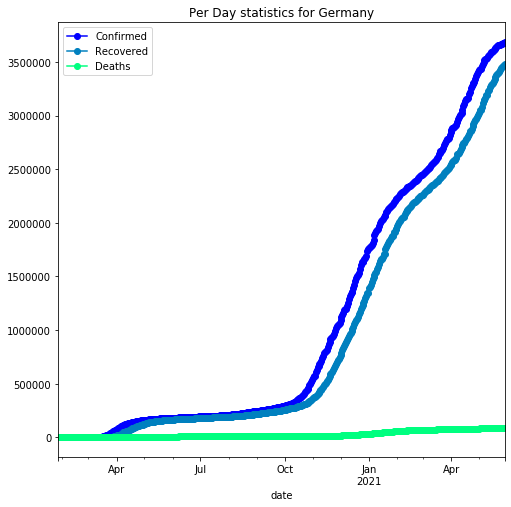

In [98]:
germany_cases_complete=df.loc[df['Country/Region']=='Germany']
germany_cases_complete['date'] = germany_cases_complete['ObservationDate'].dt.date
germany_cases_complete['date']=pd.to_datetime(germany_cases_complete['date'])
germany_cases_complete = germany_cases_complete[germany_cases_complete['date'] > pd.Timestamp(date(2020,1,21))]
num_plot = germany_cases_complete.groupby('date')["Confirmed", "Recovered", "Deaths"].sum()
num_plot.plot(figsize=(8,8),title='Per Day statistics for Germany',colormap='winter',marker='o')
plt.show()

### Cases reported in the last few days in Germany

In [99]:
num_plot_germany=num_plot.reset_index()
num_plot_germany['Death Case Increase']=0
num_plot_germany['Confirmed Case Increase']=0
num_plot_germany['Confirmed Case Increase'][0]=0
num_plot_germany['Death Case Increase'][0]=0
for i in range(1,num_plot_germany.shape[0]):
    num_plot_germany['Confirmed Case Increase'][i]=-(num_plot_germany.iloc[i-1][1]-num_plot_germany.iloc[i][1])
    num_plot_germany['Death Case Increase'][i]=-(num_plot_germany.iloc[i-1][3]-num_plot_germany.iloc[i][3])
num_plot_germany.tail()

,date,Confirmed,Recovered,Deaths,Death Case Increase,Confirmed Case Increase
483,2021-05-25,3662568,3439570,87733,272,2578
484,2021-05-26,3667041,3452290,88000,267,4473
485,2021-05-27,3673990,3463130,88192,192,6949
486,2021-05-28,3680159,3472650,88360,168,6169
487,2021-05-29,3684672,3479700,88413,53,4513


### Total confirmed cases in Germany till  29th May, 2021

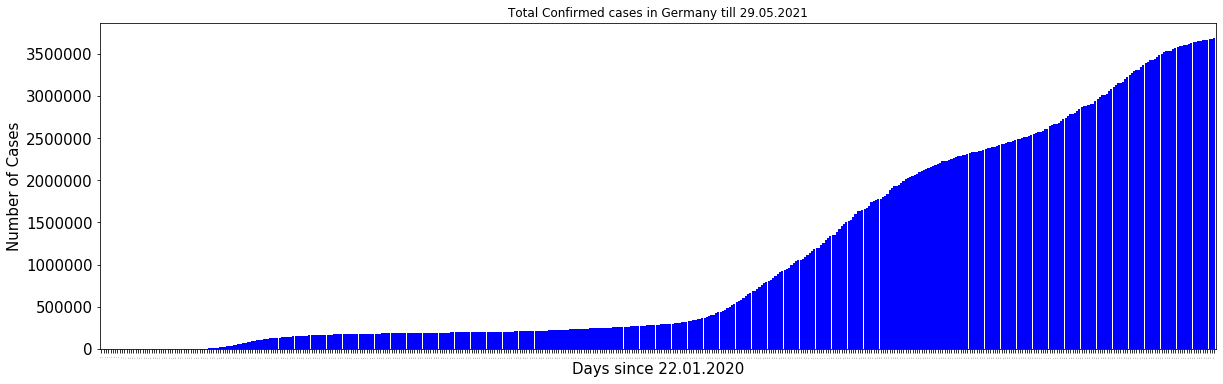

In [100]:
num_plot_germany['Confirmed'].plot(kind='bar',width=0.95,figsize=(20,6),colormap='winter',title='Total Confirmed cases in Germany till 29.05.2021')
plt.xticks(size=0)
plt.yticks(size=15)
plt.ylabel('Number of Cases', size=15)
plt.xlabel('Days since 22.01.2020', size = 15)
plt.show() 

### Total Recovered cases in Germany till  29th May, 2021

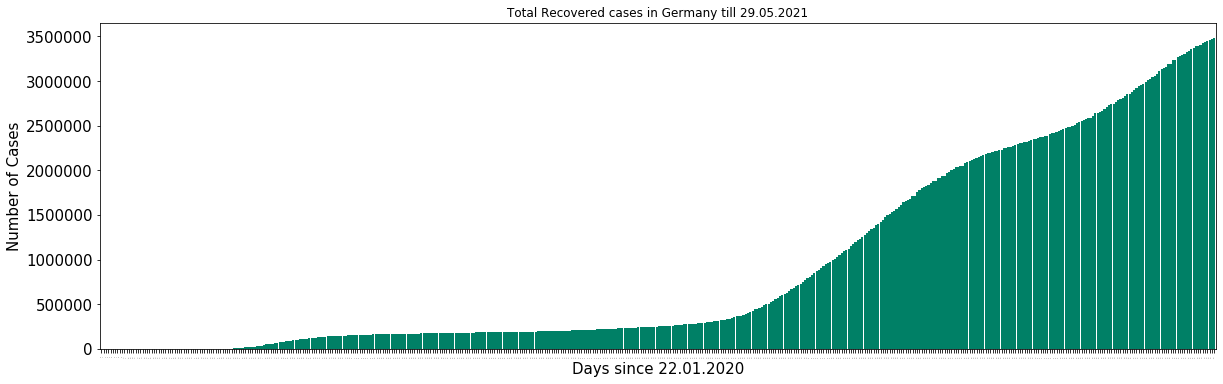

In [101]:
num_plot_germany['Recovered'].plot(kind='bar',width=0.95,figsize=(20,6),colormap='summer',title='Total Recovered cases in Germany till 29.05.2021')
plt.xticks(size=0)
plt.yticks(size=15)
plt.ylabel('Number of Cases', size=15)
plt.xlabel('Days since 22.01.2020', size = 15)
plt.show()

### Total Death Cases in Germany till  29th May, 2021

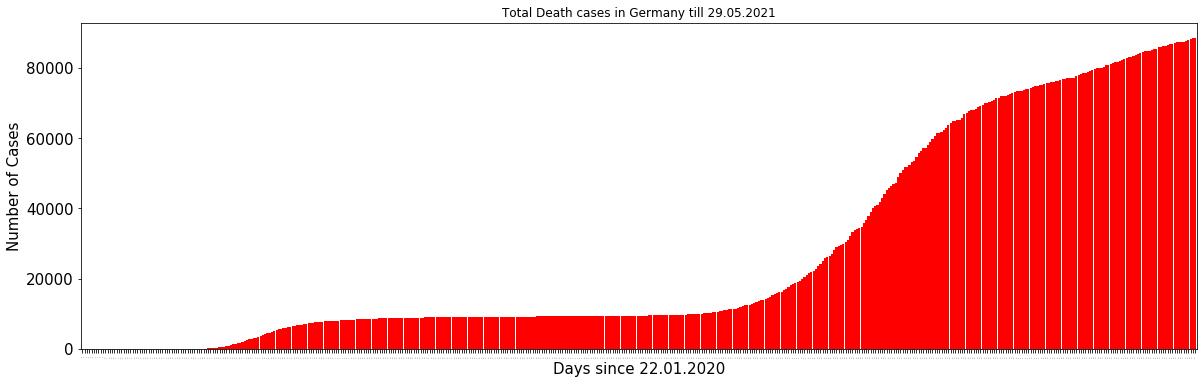

In [102]:
num_plot_germany['Deaths'].plot(kind='bar',width=0.95,figsize=(20,6),colormap='autumn',title='Total Death cases in Germany till 29.05.2021')
plt.xticks(size=0)
plt.yticks(size=15)
plt.ylabel('Number of Cases', size=15)
plt.xlabel('Days since 22.01.2020', size = 15)
plt.show()

**From the graphical analysis of the Total Confirmed cases, Recovered cases and death cases we have seen that the graph is flattened after the peak occured. Which shows that the country is doing quite great job to fight against the virus**

### Confirmed cases increased in Germany till  29th May, 2021

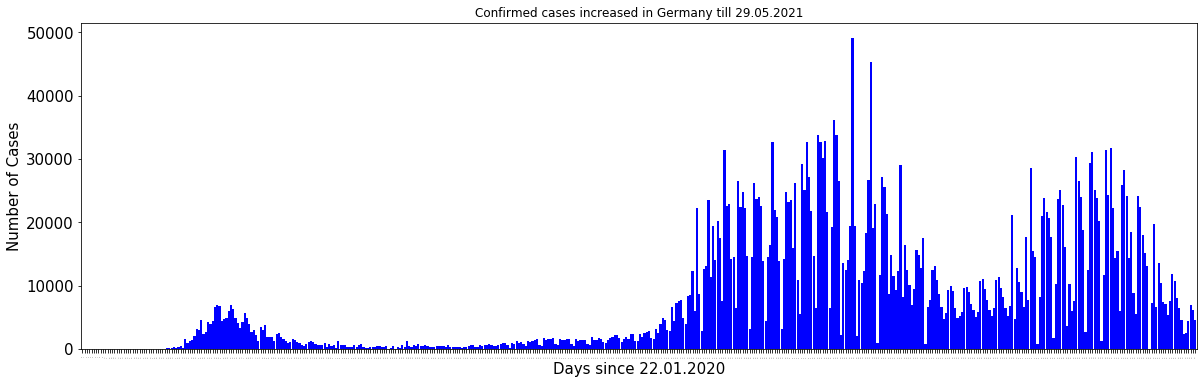

In [103]:
num_plot_germany['Confirmed Case Increase'].plot(kind='bar',width=0.95,figsize=(20,6),colormap='winter',title='Confirmed cases increased in Germany till 29.05.2021')
plt.xticks(size=0)
plt.yticks(size=15)
plt.ylabel('Number of Cases', size=15)
plt.xlabel('Days since 22.01.2020', size = 15)
plt.show()

**From the graph analysis we have got that the confirmed cases are now lowered to 1000 whereas the peak was at the 7000 mark a few months back. Which seems that the country is healing! But in the recent times unfortunately the condition is getting worser for the country as it saw per day 30000 rise suddenly**

### Death Cases Increased in Germany till  29th May, 2021

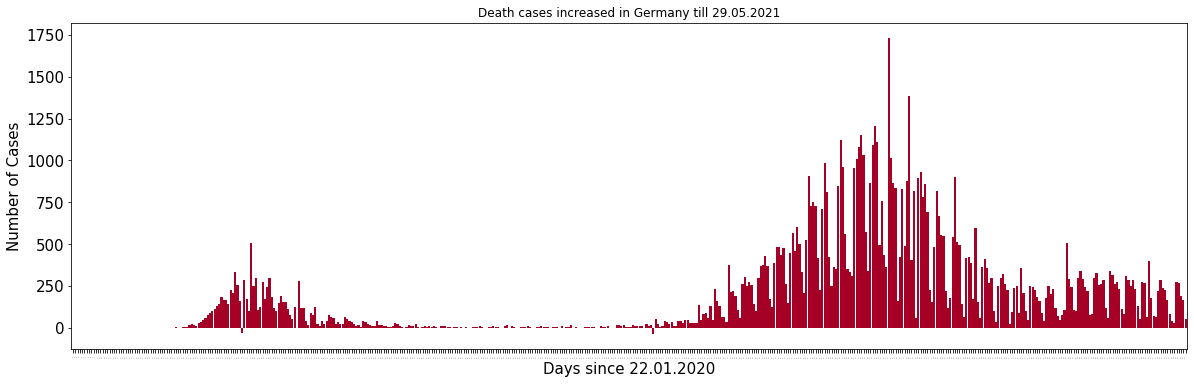

In [104]:
num_plot_germany['Death Case Increase'].plot(kind='bar',width=0.95,figsize=(20,6),colormap='RdYlBu',title='Death cases increased in Germany till 29.05.2021')
plt.xticks(size=0)
plt.yticks(size=15)
plt.ylabel('Number of Cases', size=15)
plt.xlabel('Days since 22.01.2020', size = 15)

plt.show()

**As per the analysis the Death tolls decreased to minimal numbers and it is clearly shows that Germany has fought against the virus pretty much**

### From the analysis we can say that, Germany has overcome the pandemic situation positively!

*********************

## F. Does the Tech-country, Japan overcome the situation?

First outbreak: On 15 January 2020, the Ministry of Health, Labour and Welfare, Japan (MHLW) reported an imported case of laboratory-confirmed 2019-novel coronavirus (2019-nCoV) from Wuhan, Hubei Province, China.
Total affected: Cases increasing rate is very high from February 15. Total affected is 31735. Number of daily new cases is lesser than number of cases in mid February but it was in level from September 12 to November 7.
Death Rate: Number of death rate is creasing but daily death cases are reduced from February-March time. Number of death is 2001 till 25 November.


### Per day statistics for Japan, till  29th May, 2021

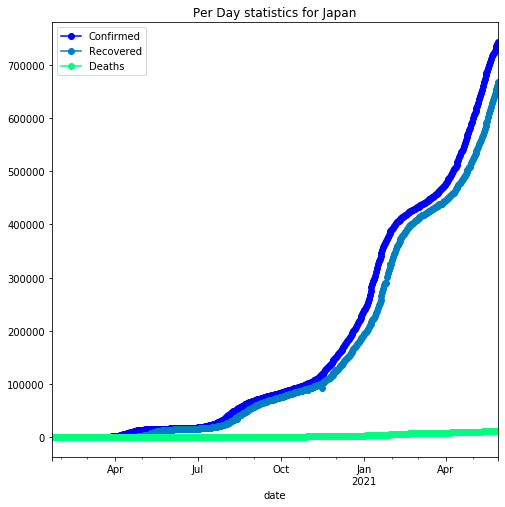

In [105]:
japan_cases_complete=df.loc[df['Country/Region']=='Japan']
japan_cases_complete['date'] = japan_cases_complete['ObservationDate'].dt.date
japan_cases_complete['date']=pd.to_datetime(japan_cases_complete['date'])
japan_cases_complete = japan_cases_complete[japan_cases_complete['date'] > pd.Timestamp(date(2020,1,21))]
num_plot = japan_cases_complete.groupby('date')["Confirmed", "Recovered", "Deaths"].sum()
num_plot.plot(figsize=(8,8),title='Per Day statistics for Japan',colormap='winter',marker='o')
plt.show()

### Cases reported in recent times in Japan

In [106]:
num_plot_japan=num_plot.reset_index()
num_plot_japan['Death Case Increase']=0
num_plot_japan['Confirmed Case Increase']=0
num_plot_japan['Confirmed Case Increase'][0]=0
num_plot_japan['Death Case Increase'][0]=0
for i in range(1,num_plot_japan.shape[0]):
    num_plot_japan['Confirmed Case Increase'][i]=-(num_plot_japan.iloc[i-1][1]-num_plot_japan.iloc[i][1])
    num_plot_japan['Death Case Increase'][i]=-(num_plot_japan.iloc[i-1][3]-num_plot_japan.iloc[i][3])
    if (num_plot_japan['Confirmed Case Increase'][i]<0):
        num_plot_japan['Confirmed Case Increase'][i]=0
    if (num_plot_japan['Death Case Increase'][i]<0):
        num_plot_japan['Death Case Increase'][i]=0
num_plot_japan.tail()

,date,Confirmed,Recovered,Deaths,Death Case Increase,Confirmed Case Increase
489,2021-05-25,726586,645001,12457,106,3918
490,2021-05-26,731071,649955,12573,116,4485
491,2021-05-27,735234,655066,12691,118,4163
492,2021-05-28,738935,659576,12786,95,3701
493,2021-05-29,742539,666786,12877,91,3604


**In the recent times the number of confirmed cases are increasing suddenly, and also it increases the death toll in the recent 5days as of 12th August, 2020**

### Total no. of Confirmed cases in Japan till  29th May, 2021

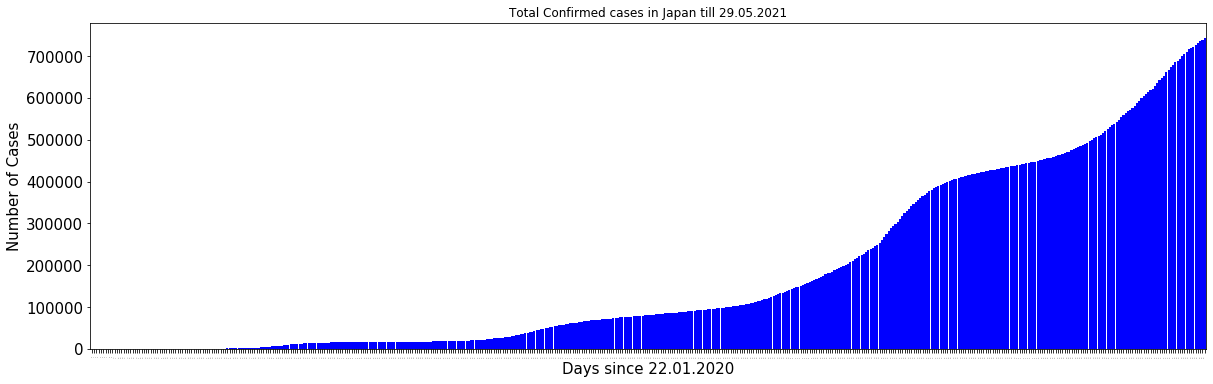

In [107]:
num_plot_japan['Confirmed'].plot(kind='bar',width=0.95,figsize=(20,6),colormap='winter',title='Total Confirmed cases in Japan till 29.05.2021')
plt.xticks(size=0)
plt.yticks(size=15)
plt.ylabel('Number of Cases', size=15)
plt.xlabel('Days since 22.01.2020', size = 15)
plt.show()

**As per the graphical analysis of the data we can observe that the confirmed cases are flattened at the 20000 mark and at that period we all thought that Japan has fought against the virus very well. But unfortunately in the last 2 weeks there is suddenly an upswing with steep slope upwards has been shown in the curve. This cost Japan an increment in the Total no. of Confirmed cases from merely 20000 to a rapid 50000 in just two weeks. But the main part of the tension is the new slope in the curve is very much steep and it's upswinging day by day. It does not provide any kind of flatness in the curve which may cost Japan at a very high risk**

### Total no. of Recovered cases in Japan, till  29th May, 2021

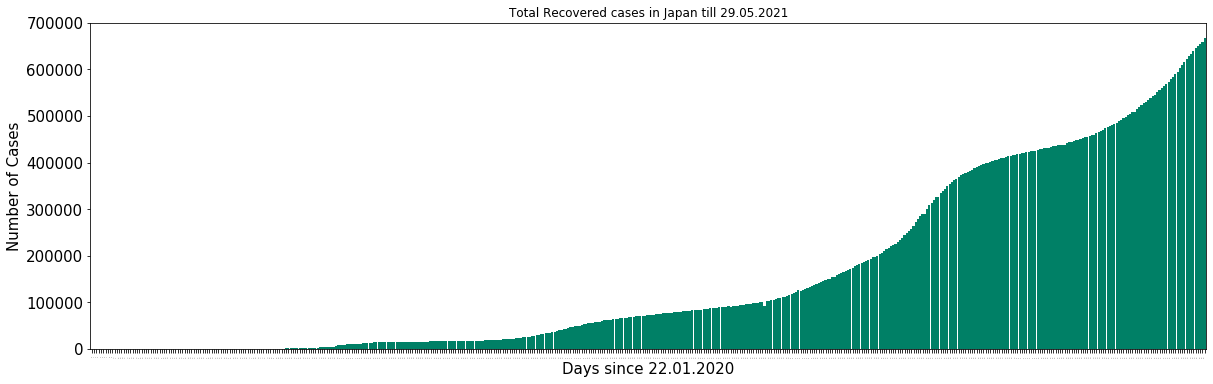

In [108]:
num_plot_japan['Recovered'].plot(kind='bar',width=0.95,figsize=(20,6),colormap='summer',title='Total Recovered cases in Japan till 29.05.2021')
plt.xticks(size=0)
plt.yticks(size=15)
plt.ylabel('Number of Cases', size=15)
plt.xlabel('Days since 22.01.2020', size = 15)
plt.show()

**If we think about the curve of the confirmed cases the recovery rate is also upswinging manner. That will help Japan to get rid of this high situation**

### Total no. of Death cases in Japan till  29th May, 2021

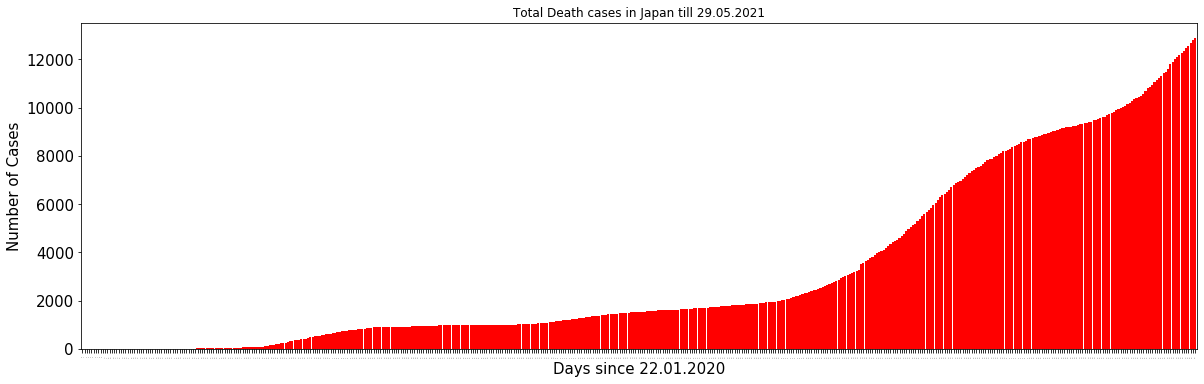

In [109]:
num_plot_japan['Deaths'].plot(kind='bar',width=0.95,figsize=(20,6),colormap='autumn',title='Total Death cases in Japan till 29.05.2021')
plt.xticks(size=0)
plt.yticks(size=15)
plt.ylabel('Number of Cases', size=15)
plt.xlabel('Days since 22.01.2020', size = 15)
plt.show()

**As per the curve of the Total confirmed cases and total recovered cases we can easily said that, Japan made a huge impact in the in earlier days as a result they saw a flattened curve for 1-2 months. But whwnever they thought that this could end the spread of the virus and re-opened everything, at the very moment thay have seen the upswinging curve suddenly. But a blessing for Japan is that they have controlled the Death cases, as we can see in the curve that it is flattened from last 3 months and there is no sudden increment in the curve. Which shows a good sign for the Japan Government. But still Japan have to be cautious about the upswinging curve of the confirmed cases though the Death toll is under control right now** 

### Confirmed cases increased in Japan till  29th May, 2021

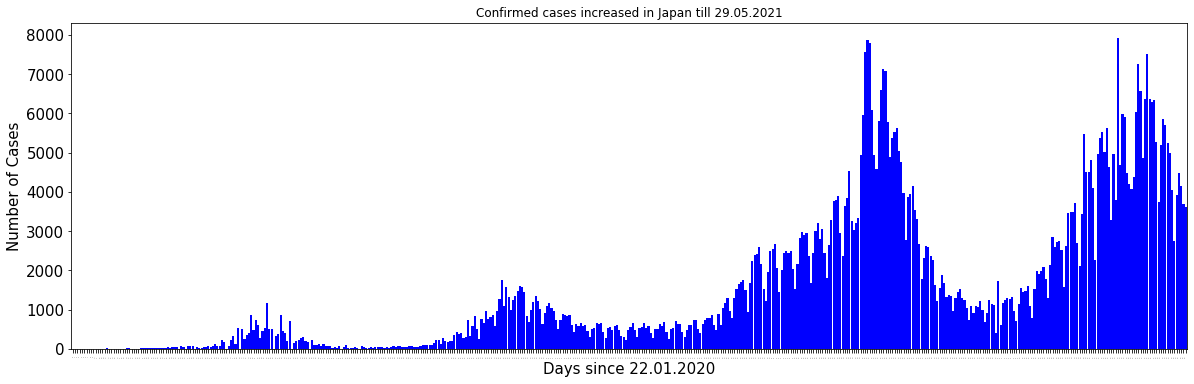

In [110]:
num_plot_japan['Confirmed Case Increase'].plot(kind='bar',width=0.95,figsize=(20,6),colormap='winter',title='Confirmed cases increased in Japan till 29.05.2021')
plt.xticks(size=0)
plt.yticks(size=15)
plt.ylabel('Number of Cases', size=15)
plt.xlabel('Days since 22.01.2020', size = 15)
plt.show()

**As you can clearly observe that the peaks are coming in the recent times though they are not coming in between of the two peaks in a gap of 2 - 3 months. In the month of May, Japan have shown a massive increment day to day confirmed cases and after that they have managed to bring the manhattans down. but unfortunately the day to day confirmed cases are increasing in a drastic manner from the previous one. The upswing is much more steeper than the previous manhattans. Which may cost Japan!** 

### Death Cases increase in Japan till  29th May, 2021

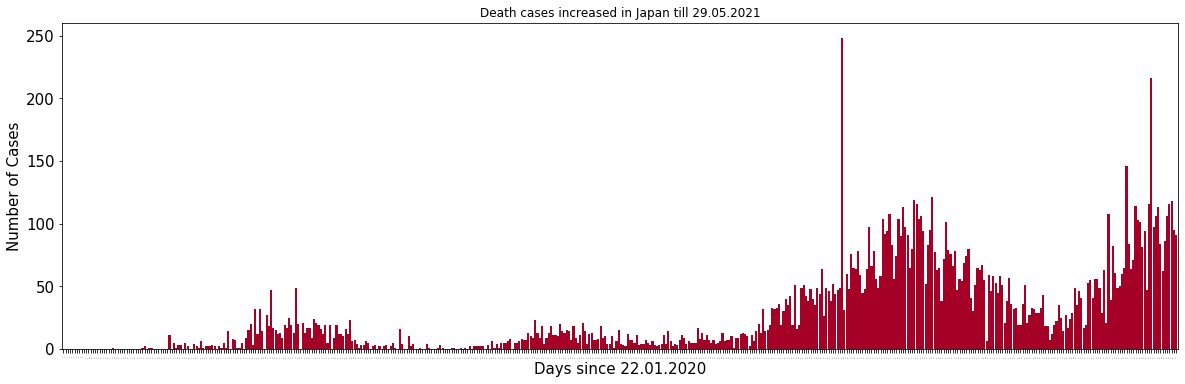

In [111]:
num_plot_japan['Death Case Increase'].plot(kind='bar',width=0.95,figsize=(20,6),colormap='RdYlBu',title='Death cases increased in Japan till 29.05.2021')
plt.xticks(size=0)
plt.yticks(size=15)
plt.ylabel('Number of Cases', size=15)
plt.xlabel('Days since 22.01.2020', size = 15)
plt.show()

**But it is really strange that in the recent times the day to day confirmed cases are increasing in an exponential manner but the death toll is flattened in the past 3 months. Which shows the dedications of the doctors and the management of Japan Government to prevent the death toll in this high time of spreading. Which is a great news and achievement for Japan**

### In the last 2-3 months Japan have flattened the curve of the confirmed cases, but unfortunately whenever they are all set to re-open everything at that very moment the confirmed cases are increasing drastically and higher than the previous upswings. Japan has controlled the situation but right now suddnly they are also facing the huge upswings and the steep slopes in the curve, though they have prevent the death tolls in the recent high time. 

**********************

## G. Australia - Did they defeat Covid-19 ?

The first confirmed case in Australia was identified on 25 January 2020, in Victoria, when a man who had returned from Wuhan, China, tested positive for the virus. Australian borders were closed to all non-residents on 20 March. Social distancing rules were imposed on 21 March, and state governments started to close 'non-essential' services.The number of new cases initially grew sharply, then levelled out at about 350 per day around 22 March, and started falling at the beginning of April to under 20 cases per day by the end of the month. A second wave of infections emerged in Victoria during May and June, which was attributed to an outbreak at a Melbourne hotel used for quarantining international arrivals. The second wave was much more widespread and deadlier than the first; at its peak, the state had over 7,000 active cases. The wave ended with zero new cases being recorded on 26 October, As of 25 November 2020, Australia has reported 27,854 cases, 25,355 recoveries, and 907 deaths, with Victoria accounting for nearly 75 percent of cases and 90 percent of fatalities.Compared to other Western countries, notably the United States and European countries, Australia's handling has been praised for its effectiveness and fast-forward reactions.

### Per Day statistics for Australia till  29th May, 2021

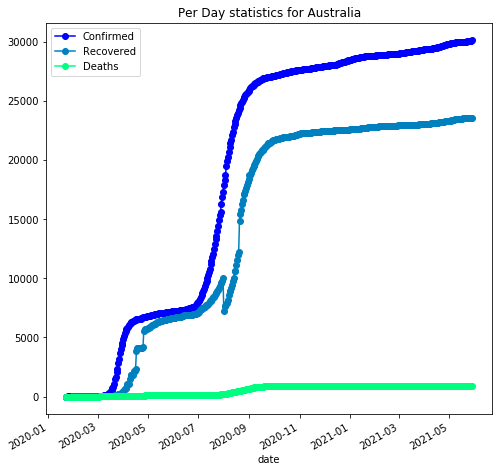

In [112]:
aus_cases_complete=df.loc[df['Country/Region']=='Australia']
aus_cases_complete['date'] = aus_cases_complete['ObservationDate'].dt.date
aus_cases_complete['date']=pd.to_datetime(aus_cases_complete['date'])
aus_cases_complete = aus_cases_complete[aus_cases_complete['date'] > pd.Timestamp(date(2020,1,21))]
num_plot = aus_cases_complete.groupby('date')["Confirmed", "Recovered", "Deaths"].sum()
num_plot.plot(figsize=(8,8),title='Per Day statistics for Australia',colormap='winter',marker='o')
plt.show()

### Cases reported in the recent times in Australia

In [113]:
num_plot_aus=num_plot.reset_index()
num_plot_aus['Death Case Increase']=0
num_plot_aus['Confirmed Case Increase']=0
num_plot_aus['Confirmed Case Increase'][0]=0
num_plot_aus['Death Case Increase'][0]=0
for i in range(1,num_plot_aus.shape[0]):
    num_plot_aus['Confirmed Case Increase'][i]=-(num_plot_aus.iloc[i-1][1]-num_plot_aus.iloc[i][1])
    num_plot_aus['Death Case Increase'][i]=-(num_plot_aus.iloc[i-1][3]-num_plot_aus.iloc[i][3])
num_plot_aus.tail()

,date,Confirmed,Recovered,Deaths,Death Case Increase,Confirmed Case Increase
487,2021-05-25,30046,23560,910,0,17
488,2021-05-26,30063,23568,910,0,17
489,2021-05-27,30074,23571,910,0,11
490,2021-05-28,30083,23575,910,0,9
491,2021-05-29,30096,23579,910,0,13


### Total no. of confirmed cases in Australia till  29th May, 2021

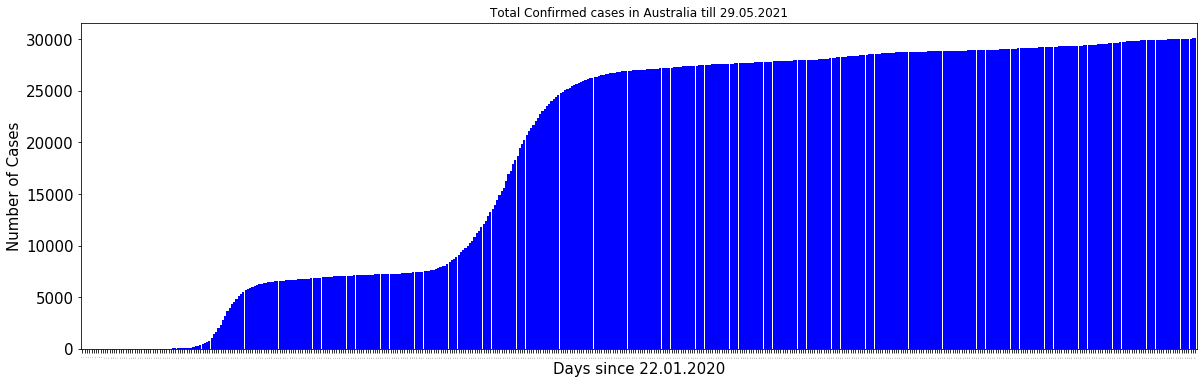

In [114]:
num_plot_aus['Confirmed'].plot(kind='bar',width=0.95,figsize=(20,6),colormap='winter',title='Total Confirmed cases in Australia till 29.05.2021')
plt.xticks(size=0)
plt.yticks(size=15)
plt.ylabel('Number of Cases', size=15)
plt.xlabel('Days since 22.01.2020', size = 15)
plt.show()

**As we can see that the flattened curve is upswinging nowadays, which may cause some serious issues for the country in the recent times. The upswinging curve of total confirmed cases show that the no. of confirmed cases are increased in the recent times and it's happening suddenly like Japan is facing**

### Total no. of Recovered cases in Australia till  29th May, 2021

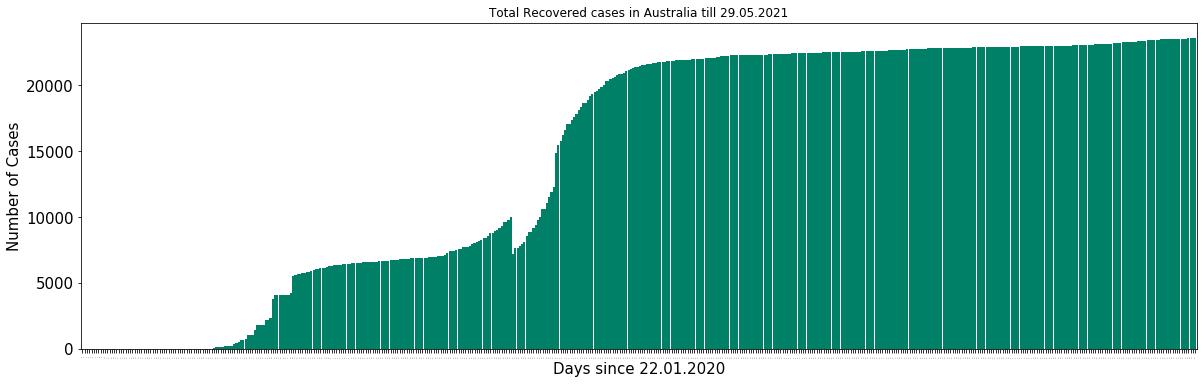

In [115]:
num_plot_aus['Recovered'].plot(kind='bar',width=0.95,figsize=(20,6),colormap='summer',title='Total Recovered cases in Australia till 29.05.2021')
plt.xticks(size=0)
plt.yticks(size=15)
plt.ylabel('Number of Cases', size=15)
plt.xlabel('Days since 22.01.2020', size = 15)
plt.show()

**As we can observe that the curve of the confirmed cases are increasing day by day and beside that the recovered cases are also increasing which shows a pretty positive sign for the country**

### Total no. of Death Cases in Australia till  29th May, 2021

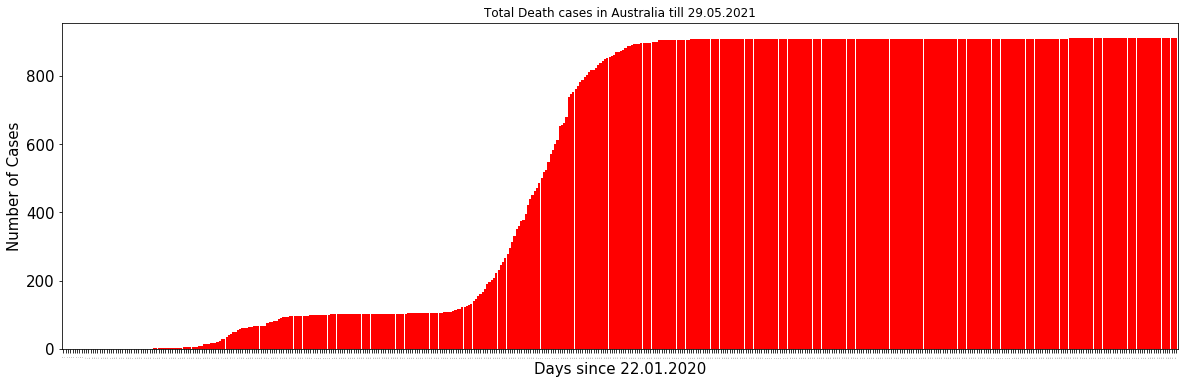

In [116]:
num_plot_aus['Deaths'].plot(kind='bar',width=0.95,figsize=(20,6),colormap='autumn',title='Total Death cases in Australia till 29.05.2021')
plt.xticks(size=0)
plt.yticks(size=15)
plt.ylabel('Number of Cases', size=15)
plt.xlabel('Days since 22.01.2020', size = 15)
plt.show()

**The Death toll is also increasing with the increment of the total confirmed cases. Which may cost the country after a certain relaxation period of flattened curve**

### Confirmed cases increased in Australia till  29th May, 2021

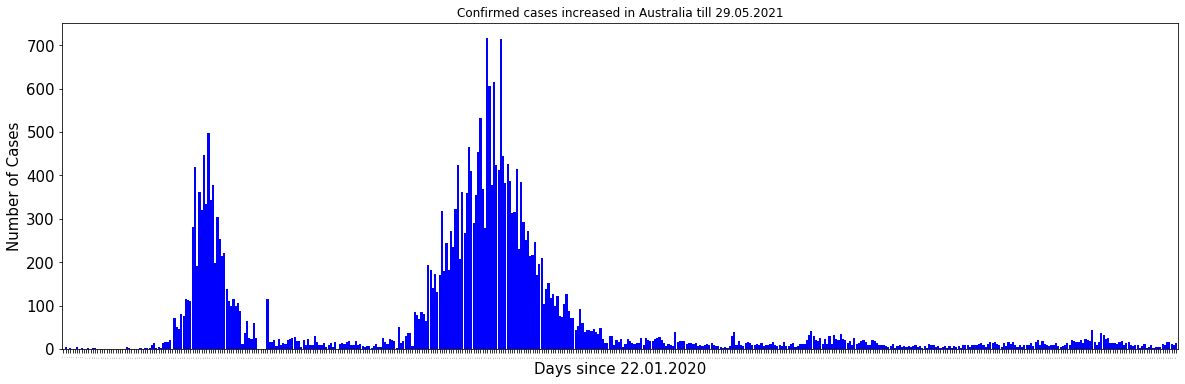

In [117]:
num_plot_aus['Confirmed Case Increase'].plot(kind='bar',width=0.95,figsize=(20,6),colormap='winter',title='Confirmed cases increased in Australia till 29.05.2021')
plt.xticks(size=0)
plt.yticks(size=15)
plt.ylabel('Number of Cases', size=15)
plt.xlabel('Days since 22.01.2020', size = 15)
plt.show()

**As the confirmed cases are increasing day by day in a huge manner it is very difficult to show composure for the Government of Australia. The confirmed cases were came down to 50 in the past 2-3 months after the drastic situation. But unfortuanately it's growing higher than the previous manhattans and showing a peak of 700 per day. But the good thing is that, in the recent times the confirmed cases per day are come down to 400 mark, which shows a good sign for Australia**

### Death cases increased in Australia till  29th May, 2021

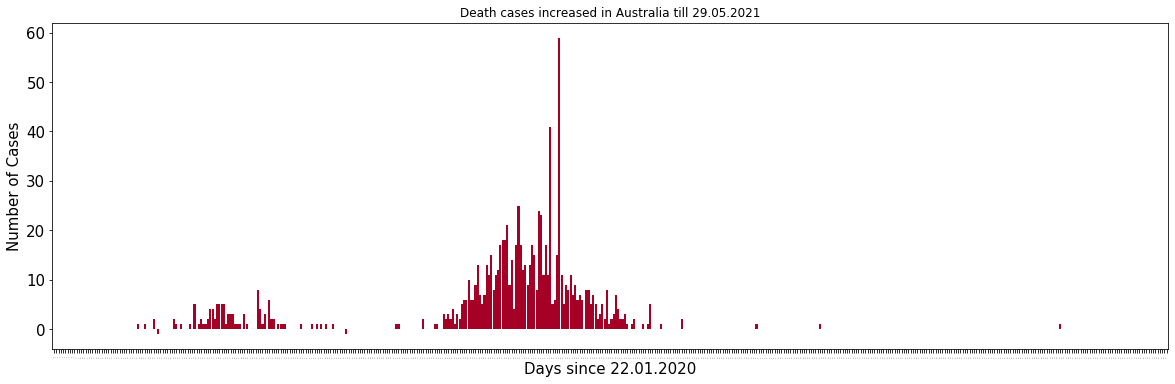

In [118]:
num_plot_aus['Death Case Increase'].plot(kind='bar',width=0.95,figsize=(20,6),colormap='RdYlBu',title='Death cases increased in Australia till 29.05.2021')
plt.xticks(size=0)
plt.yticks(size=15)
plt.ylabel('Number of Cases', size=15)
plt.xlabel('Days since 22.01.2020', size = 15)
plt.show()

**In the recent times the death toll is increasing in the day to day basis in a huge quantity, which may cost the Government of Australia in this pandemic situation. The death toll is increasing day by day very much in Australia. The highest death toll is shown in the day of 11th August, 2020 where the death toll rises to 21, the highest in the whole pandemic  situation**

### Australia had prevented the spreading of the virus but recently the country has shown the unconditional increase in the confirmed and death cases day to day

****************************
************************

# Chapter 4 :  LOCKDOWN - The Saviour or not ?

On March 24, Mr. Modi said: “I fold my hands to say — please stay where you are,” adding that “all leading experts say 21 days is the minimum we require to break the coronavirus transmission cycle. If we are not able to handle these 21 days, the country and your family will go back 21years and many families will be destroyed. I am saying this not as the Prime Minister but as your family member.” The night of his address, India recorded 536 cases — a six-fold jump in less than two weeks; there were 10 deaths. Government and health officials feel that a complete lockdown and cessation of travel will keep those who are infected isolated and restrict infections to contained clusters. This would avoid community transmission when it becomes impossible to trace the source of infections and quarantining is of no use 

The four months of lockdown delayed the peaking of cases, which significantly benefited us in the following ways
Improved health infrastructure
The lockdown gave the governments, both central and states, time to ramp up health infrastructure. 
Innovations in treatment
Since the development of specific anti-viral medicine for COVID-19 will take possibly years, the lockdown allowed doctors to come up with quick innovations in treatments by repurposing existing medicines for other diseases that have shown effectiveness against COVID-19.
Lowering the mortality rate
India has about 1.75 million total cases of COVID-19 currently. Imagine this happening in April, instead of July, when there was a shortage of beds, ventilators, basic PPE kits and absence of any treatment.

Lockdown delayed the peaking of cases allowing breathing time for other innovations also like no-touch treatment, using technology (mobile, video telephony, robots etc) to provide critically needed but scarce healthcare workers safe environment to treat patients.


#### RED LINE shows the date of IMPOSING LOCKDOWN

#### GREEN LINE shows the date of REVOKING LOCKDOWN

## A. China's Lockdown Period - SUCCESSFUL

**China impossed lockdown on 23rd January, 2020**

**China revoked lockdown on 8th April, 2020**

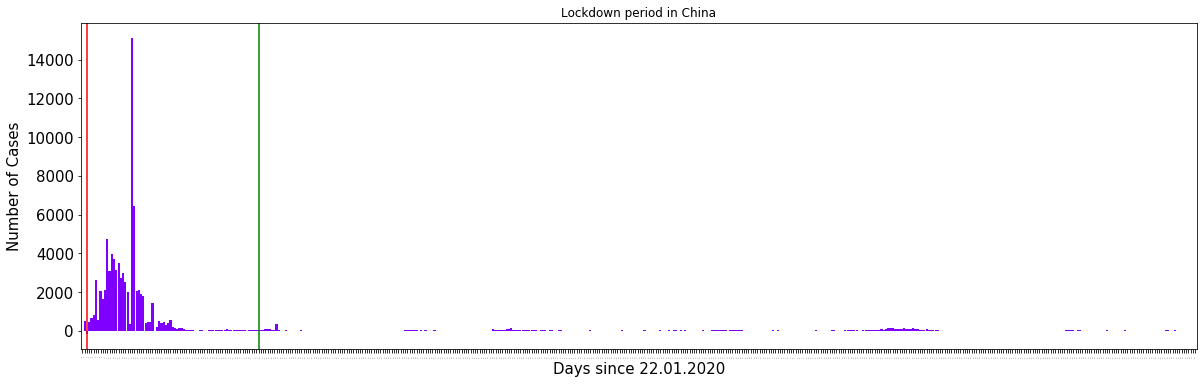

In [119]:
num_plot_china['Confirmed Case Increase'].plot(kind='bar',width=0.95,figsize=(20,6),title='Lockdown period in China',colormap='rainbow')
plt.axvline (x = 2, color = 'r')
plt.axvline (x = 78, color = 'g')
plt.xticks(size=0)
plt.yticks(size=15)
plt.ylabel('Number of Cases', size=15)
plt.xlabel('Days since 22.01.2020', size = 15)
plt.show()

**China's Lockdown : China imposed lockdown of all total 76 days and as a result the confirmed cases incrementation is nullified and turned out at a negligible rate. So definitely we can say that China imposed the lockdown in a correct manner as a result they had prevented the coronavirus spread**



-----------

## B. Italy's lockdown Period - SUCCESSFUL

**Italy imposed lockdown on 9th March, 2020**

**Italy revoked lockdown on 18th May, 2020**

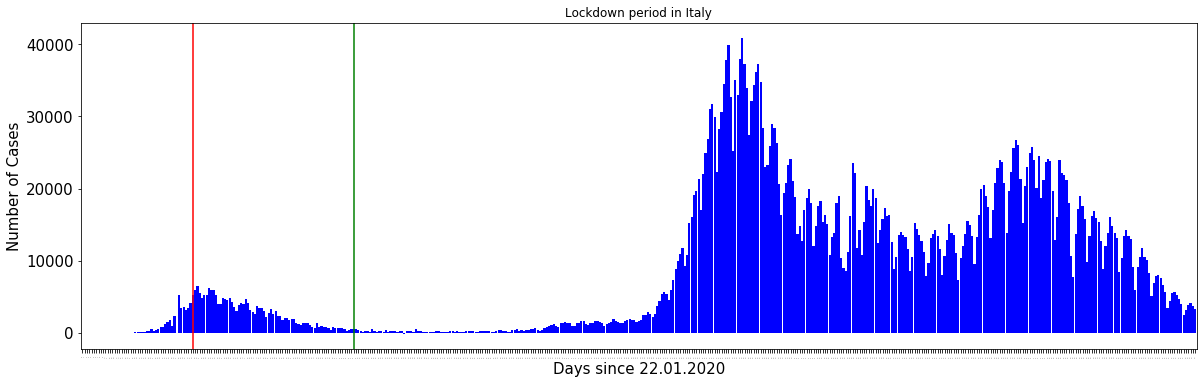

In [120]:
num_plot_italy['Confirmed Case Increase'].plot(kind='bar',width=0.95,figsize=(20,6),title='Lockdown period in Italy',colormap = 'winter')
plt.axvline (x=48, color = 'r')
plt.axvline (x=118, color = 'g')
plt.xticks(size=0)
plt.yticks(size=15)
plt.ylabel('Number of Cases', size=15)
plt.xlabel('Days since 22.01.2020', size = 15)
plt.show()

**Italy's Lockdown : Due to rapid increase of corona virus spread in Italy, the government imposed lockdown on 9th March, 2020 and the lockdown elongated to 70 days as a result the increment in the confirmed cases were decreased from 6000 per day to 500 per day (approx.). Which signifies that Italy has prevented the spread out of the virus by imposing the lockdown, and we can clearly observe that the LOCKDOWN IS SUCCESSFUL FOR ITALY!**

------------

## C. United States of America Lockdown Period - UNSUCCESSFUL

**USA imposed lockdown on 19th March, 2020**

**USA revoked lockdown on 13th June, 2020**

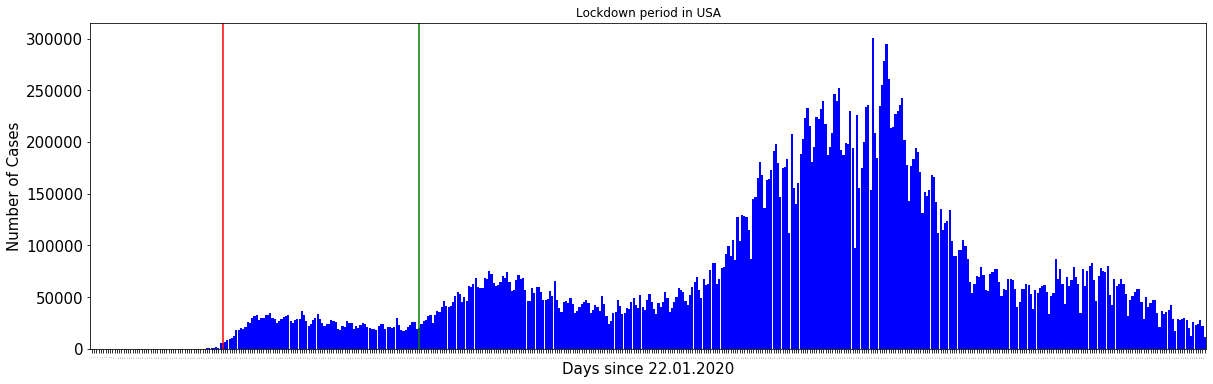

In [121]:
num_plot_us['Confirmed Case Increase'].plot(kind='bar',width=0.95,figsize=(20,6),colormap='winter',title='Lockdown period in USA')
plt.axvline (x = 58, color = 'r')
plt.axvline (x= 145, color = 'g')
plt.xticks(size=0)
plt.yticks(size=15)
plt.ylabel('Number of Cases', size=15)
plt.xlabel('Days since 22.01.2020', size = 15)
plt.show()

**USA's Lockdown : United States of America imposed lockdown on 19th March, 2020 when they were at the initial stage and the cases were 10000. After the lockdown implementation the cases were raised to 40000 daily and it was continued 87 days but the daily cases were not increased beyond 40000. At this moment Donald Trump decided to open USA and re-open the economy as they faced a decrement of 4.5% GDP, and this will cost the country hugely if the economy is not opened yet. As the lockdown revoked on 13th June, 2020, the cases are drastically increasing and creating a new record every day. As we can see that after the revokation of lockdown the condition became worser for USA. They have seen 80000 cases daily, and the tally is still increasing. Unfortunately, for USA the lockdown period is successful to some extent and to prevent the daily exponential increment but on the same side, it did not make the curve downward or even flattened. The lockdown in case of USA IS UNSUCCESSFUL!**

-------------

## D. Germany Lockdown Period - SUCCESSFUL

#### Germany imposed lockdown on 23rd March, 2020

#### Germany revoked lockdown on 10th May, 2020

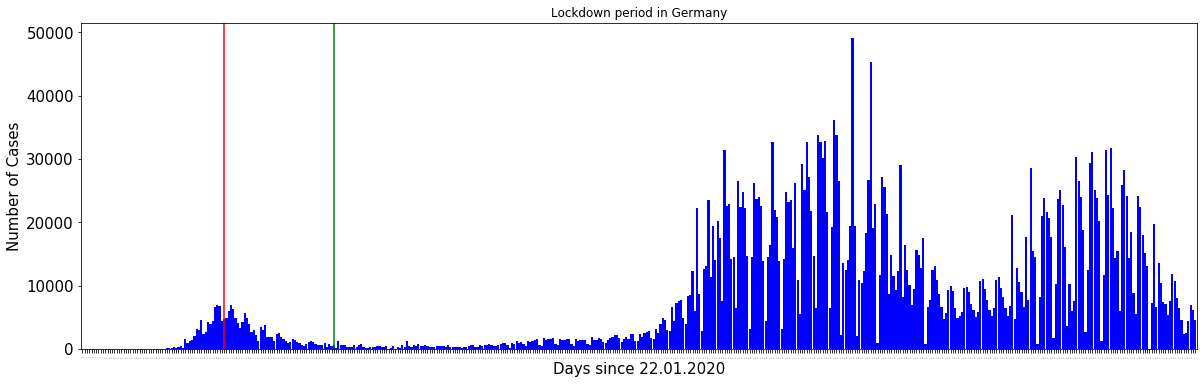

In [122]:
num_plot_germany['Confirmed Case Increase'].plot(kind='bar',width=0.95,figsize=(20,6),colormap='winter',title='Lockdown period in Germany')
plt.axvline (x = 62, color = 'r')
plt.axvline (x = 110, color= 'g')
plt.xticks(size=0)
plt.yticks(size=15)
plt.ylabel('Number of Cases', size=15)
plt.xlabel('Days since 22.01.2020', size = 15)
plt.show()

**Germany Lockdown : The government of Germany imposed lockdown from 23rd March, 2020 when the country is facing high rise in the per day confirmed case rate. They faced merely 7000 cases per day at the time of lockdown. After the lockdown was imposed, the daily new confirmed cases are slowly decreased within  a month to 2000 cases per day. Which shows that the lockdown action is successful for the country and the health sectors. At this on 10th May, 2020 they have revoked lockdown to re-open the country and economy. Still the cases are coming on a day to day basis but they are in a certain numbers around 1000. And also the death rate is also come down to 20 odd numbers. Which shows GERMANY SUCCESSFULLY IMPOSED LOCKDOWN AND PREVENTED THE BREAK THROUGH OF THE VIRUS**

---------------

## E. AUSTRALIA Lockdown - SUCCESSFUL to some extent

#### Australia imposed national lockdown on 23rd March, 2020

#### Australia eased the lockdown on 8th July, 2020

#### Australia again imposed the lockdown on 7th August, 2020 due to increment in the daily cases

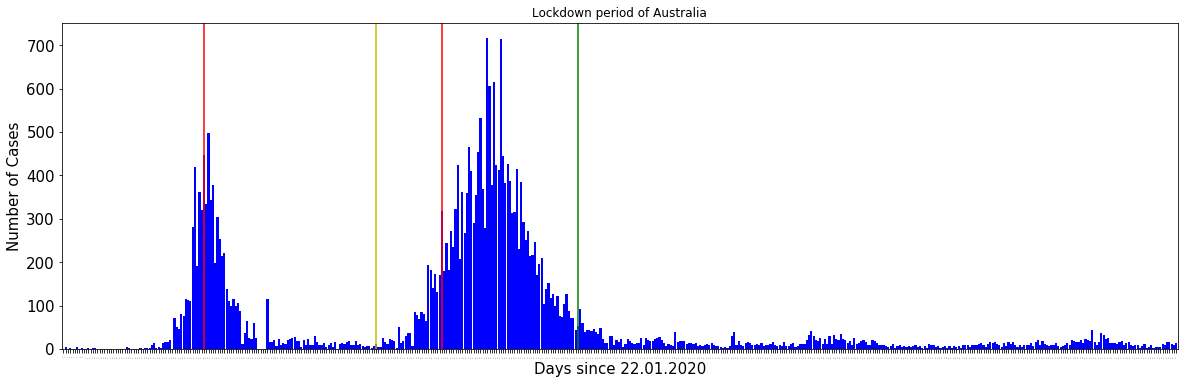

In [123]:
num_plot_aus['Confirmed Case Increase'].plot(kind='bar',width=0.95,figsize=(20,6),colormap='winter',title='Lockdown period of Australia')
plt.axvline (x = 62, color = 'r')
plt.axvline (x = 138, color = 'y')
plt.axvline (x=167, color = 'r')
plt.axvline (x=227, color = 'g')
plt.xticks(size=0)
plt.yticks(size=15)
plt.ylabel('Number of Cases', size=15)
plt.xlabel('Days since 22.01.2020', size = 15)
plt.show()

**Australia Lockdown : The government imposed lockdown on 23rd March, when the country was facing the high rise in the daily confirmed cases. After imposing the lockdown properly, the country stabilized the situation and the controlled the daily cases down to 100. At that moment the government declared that some areas will be eased from the lockdown and as a result they again saw the increment in the daily confirmed cases rapidly. At this the government imposed lockdown on 7th August, 2020 to prevent the cases. This time the cases were doubled up than the previous high rises. We can say that, AUSTRALIA SUCCESSFULLY CONTROLLED THE SPREAD OF THE VIRUS IN THE LOCKDOWN PERIOD, BUT WHENEVER THEY OPENED UP, IT BECAME WORSER FOR THEM** 

---------------

## F. JAPAN Lockdown Period - SUCCESSFUL to some extent

#### Japan imposed lockdown on 7th April, 2020

#### Japan revoked lockdown on 31st May, 2020

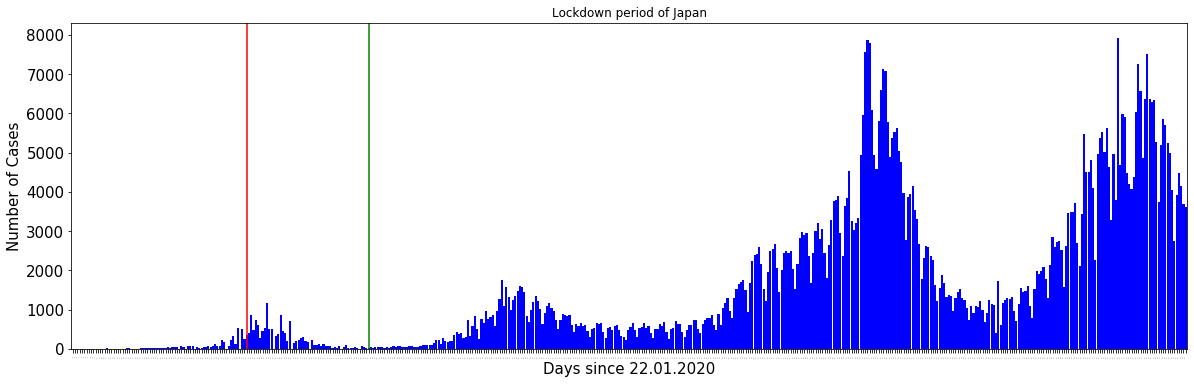

In [124]:
num_plot_japan['Confirmed Case Increase'].plot(kind='bar',width=0.95,figsize=(20,6),colormap='winter',title='Lockdown period of Japan')
plt.axvline (x = 77, color = 'r')
plt.axvline (x = 131, color = 'g')
plt.xticks(size=0)
plt.yticks(size=15)
plt.ylabel('Number of Cases', size=15)
plt.xlabel('Days since 22.01.2020', size = 15)

plt.show()

**Japan Lockdown : On the situation of increasing confirmed cases the Japan government imposed lockdown on 7th April, and they successfully controlled the cases. But the worser days were yet to come for Japan. As the lockdown was revoked the cases were slowly increasing and in a few days the cases were increasing exponentially. The daily confirmed cases are raised to 1500. And the tally is still growing. But Japan was not imposing lockdown, rather they had started rigorous testing to prevent the virus. we can say that, JAPAN IS SUCCESSFUL IN THE EARLY LOCKDOWN PERIOD AND RIGHT NOW THEY HAVE INCREASED THE TESTING TO PREVENT THE VIRUS**  

*****************************


*************************

# Chapter 5 : INDIA - The Fastest growing epicentre

The first case of coronavirus in India was identified on 30 January 2020. By 3 February, the number of cases increased to 3. On 4 March, 22 new cases were identified, of which 14 were from a group of tourists who had arrived from Italy (The Week 2020). In March, India also reported its first coronavirus-related death. The number of confirmed cases in India crossed 1000 on 29 March, 30,000 on 28 April, and 180,000 on 30 May. The death toll crossed 50 on 1 April, 1000 on 28 April, and 5000 on 30 May. As of 25th November 2020, the numbers of infected cases and deaths are 9,227,557 and 134,804, respectively (World meter 2020b).On 24 March 2020, the Government of India under Prime Minister Narendra Modi ordered a nationwide lockdown for 21 days, limiting movement of the entire 1.3 billion population of India as a preventive measure against the COVID-19 pandemic in India.It was ordered after a 14-hour voluntary public curfew on 22 March, followed by enforcement of a series of regulations in the country's COVID-19 affected regions.

**Observing the cases in India. Confirmed cases are increasing in India each day. There is a need to get a flatter curve for confirmed cases which currently is in upswing with a steep increase since past few days.**

### Per Day Statistics for India till  29th May, 2021

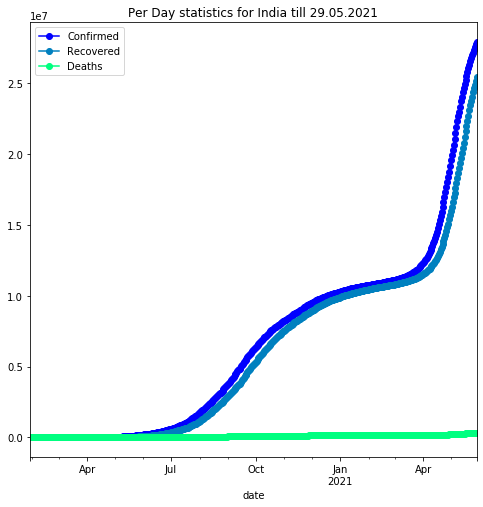

In [125]:
india_cases_complete=df.loc[df['Country/Region']=='India']
india_cases_complete['date'] = india_cases_complete['ObservationDate'].dt.date
india_cases_complete['date']=pd.to_datetime(india_cases_complete['date'])
india_cases_complete = india_cases_complete[india_cases_complete['date'] > pd.Timestamp(date(2020,1,21))]
num_plot = india_cases_complete.groupby('date')["Confirmed", "Recovered", "Deaths"].sum()
num_plot['Confirmed'][132]=287154
num_plot['Recovered'][132]=140928
num_plot['Deaths'][132]=8106
num_plot['Confirmed'][134]=309595
num_plot['Recovered'][134]=154235
num_plot['Deaths'][134]=8888
num_plot['Confirmed'][135]=321634
num_plot['Recovered'][135]=162327
num_plot['Deaths'][135]=9197
num_plot['Confirmed'][136]=333039
num_plot['Recovered'][136]=169684
num_plot['Deaths'][136]=9521
num_plot['Confirmed'][137]=343071
num_plot['Recovered'][137]=180324
num_plot['Deaths'][137]=9917
num_plot.plot(figsize=(8,8),colormap='winter',title='Per Day statistics for India till 29.05.2021',marker='o')
num_plot_india=num_plot.reset_index()

### Cases reported in the recent times in India

In [126]:
num_plot_india['Confirmed Case Increase']=0
num_plot_india['Death Case Increase']=0
#num_plot_india['Confirmed'][132]=287154
#num_plot_india['Recovered'][132]=140928
#num_plot_india['Deaths'][132]=8106
#num_plot_india['Confirmed'][134]=309595
#num_plot_india['Recovered'][134]=154235
#num_plot_india['Deaths'][134]=8888
#num_plot_india['Confirmed'][135]=321634
#num_plot_india['Recovered'][135]=162327
#num_plot_india['Deaths'][135]=9197
#num_plot_india['Confirmed'][136]=333039
#num_plot_india['Recovered'][136]=153792
#num_plot_india['Deaths'][136]=9521
#num_plot_india['Confirmed'][137]=343071
#num_plot_india['Recovered'][137]=180324
#num_plot_india['Deaths'][137]=9917
for i in range(1,num_plot_india.shape[0]):
    num_plot_india['Confirmed Case Increase'][i]=-(num_plot_india.iloc[i-1][1]-num_plot_india.iloc[i][1])
    num_plot_india['Death Case Increase'][i]=-(num_plot_india.iloc[i-1][3]-num_plot_india.iloc[i][3])
num_plot_india.tail(10)

,date,Confirmed,Recovered,Deaths,Confirmed Case Increase,Death Case Increase
476,2021-05-20,26031991,22712735,291331,259551,4209
477,2021-05-21,26289290,23070365,295525,257299,4194
478,2021-05-22,26530132,23425467,299266,240842,3741
479,2021-05-23,26752447,23728011,303720,222315,4454
480,2021-05-24,26948874,24054861,307231,196427,3511
481,2021-05-25,27157795,24350816,311388,208921,4157
482,2021-05-26,27369093,24633951,315235,211298,3847
483,2021-05-27,27555457,24893410,318895,186364,3660
484,2021-05-28,27729247,25178011,322512,173790,3617
485,2021-05-29,27894800,25454320,325972,165553,3460


**8th August has recorded highest number of COVID19 confirmed cases in India in a day (64399). In the last few days the peak in cases have been increasing almost everyday. Note: We are not considering the stats on 28th and 29th July because it seems to be incorrect.**

### Confirmed cases increased in India till  29th May, 2021

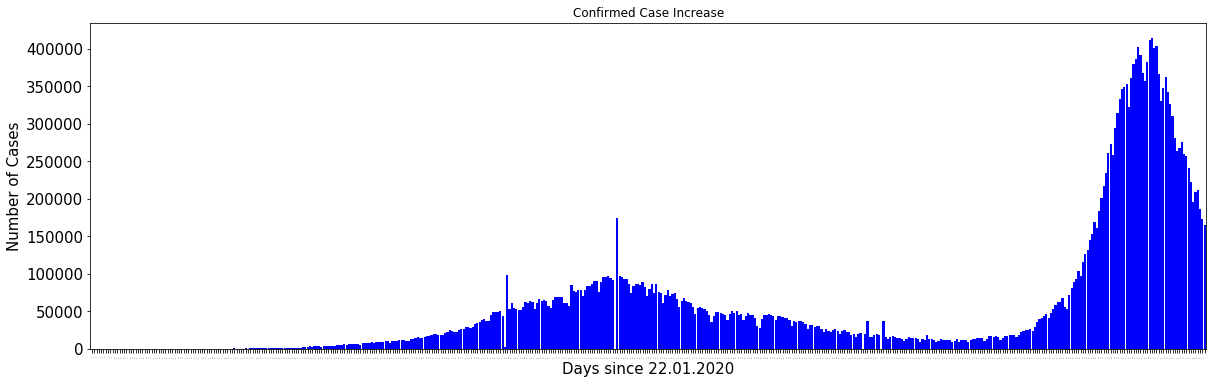

In [127]:
num_plot_india['Confirmed Case Increase'].plot(kind='bar',width=0.95,colormap='winter',figsize=(20,6),title='Confirmed Case Increase')
plt.xticks(size=0)
plt.yticks(size=15)
plt.ylabel('Number of Cases', size=15)
plt.xlabel('Days since 22.01.2020', size = 15)
plt.show()

**The day to day confirmed cases are increasing exponentially and everyday India is creating a new record on the per day confirmed cases**

### Death cases increased in India till  29th May, 2021

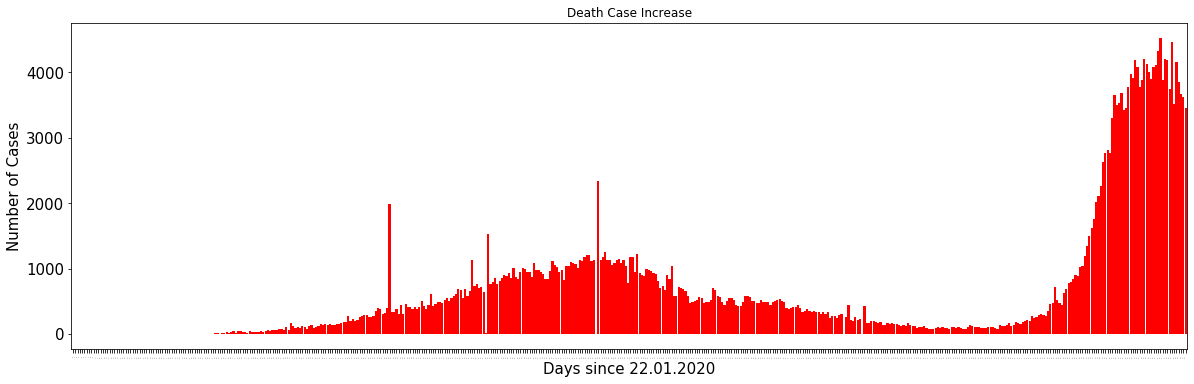

In [128]:
num_plot_india['Death Case Increase'].plot(kind='bar',width=0.95,colormap='autumn',figsize=(20,6),title='Death Case Increase')
plt.xticks(size=0)
plt.yticks(size=15)
plt.ylabel('Number of Cases', size=15)
plt.xlabel('Days since 22.01.2020', size = 15)
plt.show()

**As the day to day confirmed cases are increasing exponentially thedeath cases are also increasing in the exponential manner with a rate of min 1000 people per day. The highest peak have obtained of 2000 people have died in a day. And the number is increasing daily**

### Total no. of confimed cases in India till  29th May, 2021

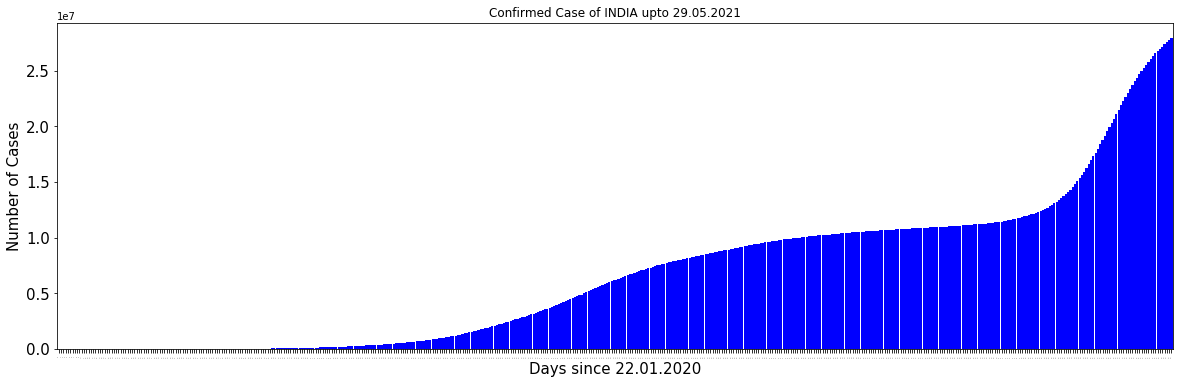

In [129]:
num_plot_india['Confirmed'].plot(kind='bar',width=0.95,colormap='winter',figsize=(20,6),title='Confirmed Case of INDIA upto 29.05.2021')
plt.xticks(size=0)
plt.yticks(size=15)
plt.ylabel('Number of Cases', size=15)
plt.xlabel('Days since 22.01.2020', size = 15)
plt.show()

### Total no. of Recovered cases in India till  29th May, 2021

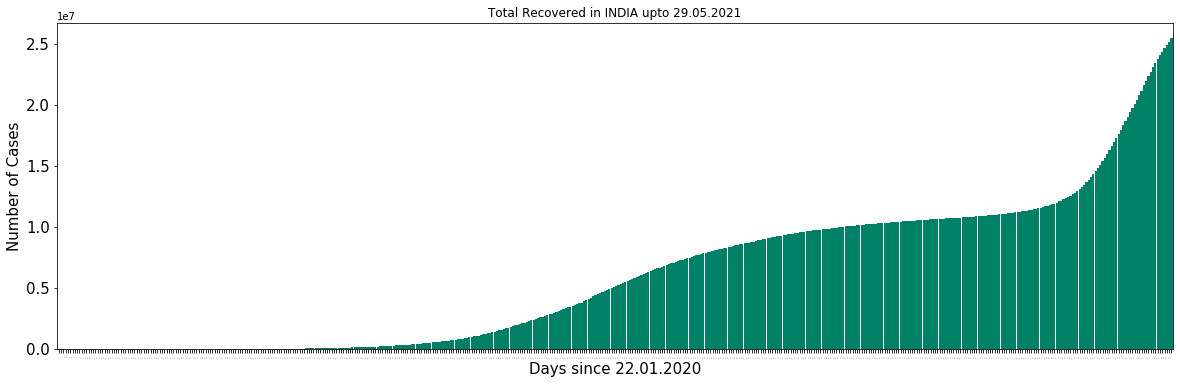

In [130]:
num_plot_india['Recovered'].plot(kind='bar',width=0.95,colormap='summer',figsize=(20,6),title='Total Recovered in INDIA upto 29.05.2021')
plt.xticks(size=0)
plt.yticks(size=15)
plt.ylabel('Number of Cases', size=15)
plt.xlabel('Days since 22.01.2020', size = 15)
plt.show()

### Total no. of Death cases in India till  29th May, 2021

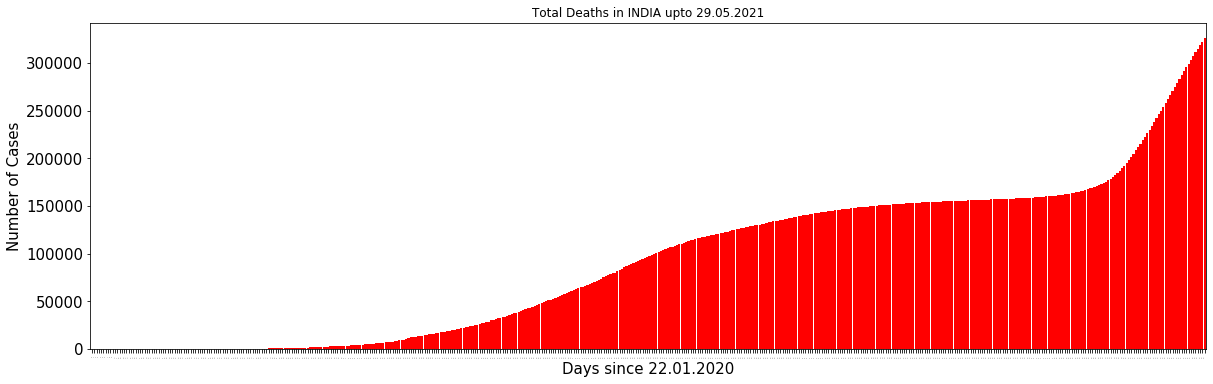

In [131]:
num_plot_india['Deaths'].plot(kind='bar',width=0.95,colormap='autumn',figsize=(20,6),title='Total Deaths in INDIA upto 29.05.2021')
plt.xticks(size=0)
plt.yticks(size=15)
plt.ylabel('Number of Cases', size=15)
plt.xlabel('Days since 22.01.2020', size = 15)
plt.show()

**In the current situation of pandemic the confirmed cases are creating new record daily as well as the death cases. The death toll rises upto 50000 still it is not flattening anymore. Not a single chance of flattening has seen in the curve rather the growth rate is exponentially. India is yet to have the worst situation like United States are having** 

## >> INDIA's LOCKDOWN PERIOD - UNSUCCESSFUL 

### India imposed lockdown on 23rd March, 2020

### India revoked lockdown on 30th June, 2020

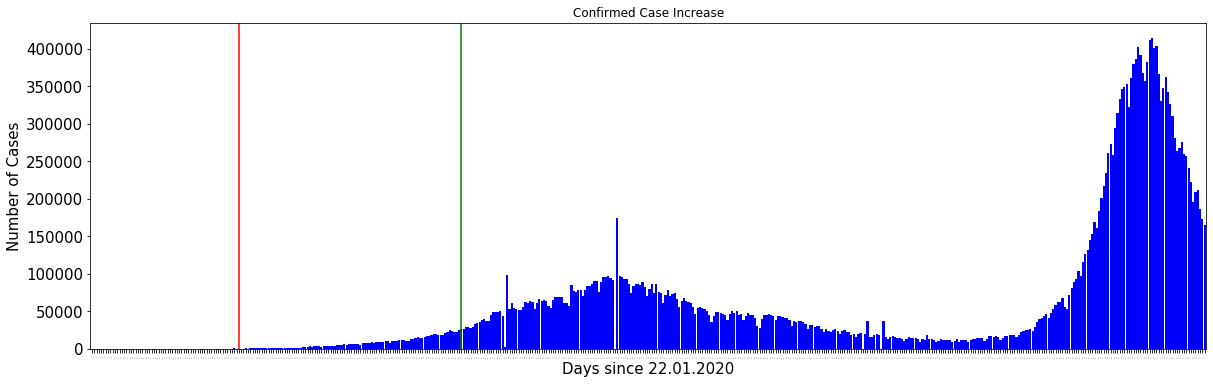

In [132]:
num_plot_india['Confirmed Case Increase'].plot(kind='bar',width=0.95,colormap='winter',figsize=(20,6),title='Confirmed Case Increase')
plt.axvline (x=64, color = 'r')
plt.axvline (x= 161, color = 'g')
plt.xticks(size=0)
plt.yticks(size=15)
plt.ylabel('Number of Cases', size=15)
plt.xlabel('Days since 22.01.2020', size = 15)
plt.show()

**India Lockdown : After watching the world suffering from the virus, India has take precaution earlier and imposed lockdown on 23rd march, 2020. After that the cases were increasing in a daily basis and exponentially, and the toll reached to 40000 mark. At that time the government decided to revoke the lockdown. As a result the cases were raised to 2500000 (As of the data of 12th August, 2020). India is having the worst condition in the world. The cases are increasing 60000 daily. There is no sign of flattening the curve rather it is exponentially increasing and the curve is obtaining more and more steep slope day by day. INDIA, IN THE PERSPECTIVE OF LOCKDOWN WAS TOTALLY UNSUCCESSFUL, AND BECAME 3RD HIGHEST INFECTED COUNTRY IN THE WORLD**  

********************

## Conclusion
Upto this data analysis we conclude these following things - 
1. **228 Countries were affected by Covid-19**

2. **USA** is the worst affected country in terms of Covid 19 with 19.57% share of the confirmed cases of the world.

3. After USA, **India and Brazil** are at the second and third place respectively with 16.41% and 9.69% holdings on the Covid-19 confirmed cases share.

4. **Recovery rate of India is the highest among all countries.**

5. **In terms of Death rate Brazil is at the highest point.**

6. **Hubei** is the place, where Covid-19 surge was first detected.

7. Graphs of China shows that they have controlled everything!

8. But the world excluding China is still suffering from this, and the cases are growing exponentially with no brake!

9. The whole world except China is facing the Third wave of the Covid surge.

10. **Italy** have controlled the situation but unfortunately, they have broken down again as the confirmed cases are increasing exponentially, than the previous waves.

11. Italy's second and third waves are one of the scariest pandemic situation.

12. **USA** is the worst affected country, although the vaccination is going on but still the cases are  increasing exponentially. USA is at the fourth wave of this pandemic.

13. **South Korea** was annouced as the most successful country in terms of fighting against covid, but they too have broken down as the second and third wave hit them so hard.They are now fighting against the fourth wave of this pandemic.

14. While talking about **UK**, this is the only major country that has successfully tackled the situation, although they have suffered three waves of covid surge but after that they have held up the fourth wave and the confirmed cases graph tells the story!

15. **Germany**, another economic giant, was able to successfully tackle the first wave but broken down on second and third wave, just like South Korea. Germany is eager to control the situation and waneted to hold the fourth wave.

16. Tech giant **Japan**, is not performing well, as they are facing the fourth wave of pandemic. The third and fourth wave of Covid-19 demolished their health facilities. They are eager to control the fourth wave.

17. **Australia**, the countries of Kangaroos, held up the pandemic only at the second wave without imposing strict lockdown. Now from the last 10-12 months the cases are like 50-60 per day, which shows the control over the pandemic, despite of the fact that the world is suffering from the same virus.

18. **Lockdown for major countries, was successful or not!** Let's find out using this chart -

|Country|Lockdown|
|:---:|:---:|
|China|Successful|
|Italy|Successful|
|United States of America|Unsuccessful|
|Germany|Successful|
|Australia|Successful|
|Japan|Successful|

19. **India, the fastest growing epicenter**, only the second wave has hit India, but it seems like fourth wave is there. The per day confirmed cases count were 400000, which shows the condition of this country. Only the second wave is there, third wave is yet to come. But for India the plus point is the recovered cases rate, which is highest among all the countries, but despite of that, India is the second worst affected country.
Now talking about Lockdown in India, the government imposed lockdown early, so that they can control the pandemic, but that didn't go their way. As soon as the lockdown revoked the cases were jumped in a rocket speed. Never ever you can see the curve of India to be flatten for a long amount of time like Australia or, UK, once the cases were decreased, at that very moment, another spike of cases comes out. For India, Lockdown implementation was barely unsuccessful and it showed up in the following times! As lockdown did nothing to control the surge.


*************************************
### Hope this analysis will help you!
A lot more to come about Covid-19!

*Contributed by, Abhishek Sharma, 2021 [@abhishek](https://github.com/abhisheks008)*


### Thank You!